# Univariate Analysis

## Numerical Variables

### Histogram Overview

Let's get an overview of the distributions of the numerical variables.

In [54]:
def histogram_overview(data):
    """
    Histogram Overview function
    
    This function below generates a subplots of  `histogram plots` & 
    showing the `distribution of the numerical varible input`
    
    * Generates subplots for each numerical variable in a three column structure.
    * The function takes the Pandas dataframe as the input
    * The function selects the numerical variables from the applied dataframe.
    * It generates a vertical `line` to indicate the `mean`, `median` and `mode` on the histogram
    * `sns.set_style` - sets the Seaborn theme
    * `subplot_nrows` - calculated number of subplot rows
    * `subplot_ncols` - configures the three column structure subplots
    * `figsize` - indicates the size of the plot
    * `sns.reset_defaults()` - resets Seaborn themes and settings to default
    
    """
    num_vars = data.select_dtypes(include=np.number).columns.to_list()
    plt.figure(figsize=(10, 10))
    for i in range(len(num_vars)):
        # Set seaborn theme
        sns.set_style("darkgrid")
        # Subplot no of columns
        subplot_ncols = np.ceil(np.sqrt(len(num_vars)))
        # Subplot no of rows
        subplot_nrows = subplot_ncols

        plt.subplot(subplot_nrows, subplot_ncols, i + 1)

        plt.hist(data[num_vars[i]])
        #Plot vertical line for the mean
        plt.axvline(data[num_vars[i]].mean(),
                    color='green',
                    linestyle='--',
                    label="mean")
        #Plot vertical line for the median
        plt.axvline(data[num_vars[i]].median(),
                    color='red',
                    linestyle='-',
                    label="median")
        #Plot vertical line for the mode
        plt.axvline(data[num_vars[i]].mode()[0],
                    color='black',
                    linestyle='-',
                    label="mode")
        plt.legend()
        plt.tight_layout()
        plt.title(num_vars[i], fontsize=16)
    plt.show()
    # Reset seaborn theme
    sns.reset_defaults()

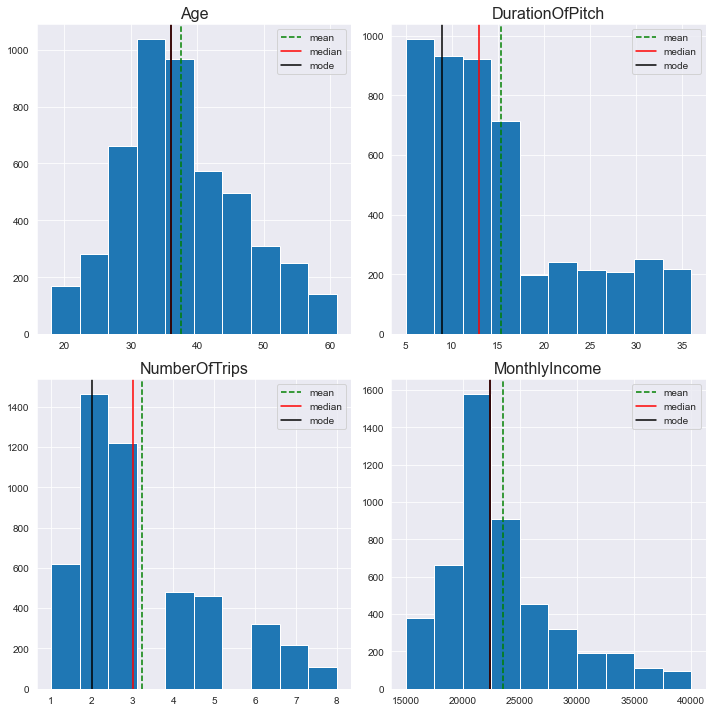

In [55]:
histogram_overview(data[numerical_vars])

**Observation:**
* **Age** - Somewhat normal as the mean and median are very close
* **DurationOfPitch** , **NumberOfTrips** & **MonthlyIncome** -  Right skewed

### Boxplot overview

Let's get a boxplot overview across each numerical variable

In [56]:
def boxplot_overview(data):
    """
    This function below generates a subplots of  `box plots` & 
    showing the `distribution of the numerical varible input with outliers`.
    
    * Generates subplots for each numerical variable in a three column structure.
    * The function takes the Pandas dataframe as the input
    * The function selects the numerical variables from the applied dataframe.
    * It shows the `mean` in the boxplot.
    * `sns.set_style` - sets the Seaborn theme
    * `subplot_nrows` - calculated number of subplot rows
    * `subplot_ncols` - configures the three column structure subplots
    * `figsize` - indicates the size of the plot
    * `sns.reset_defaults()` - resets Seaborn themes and settings to default
    
    """

    num_vars = data.select_dtypes(include=np.number).columns.to_list()
    plt.figure(figsize=(10, 10))
    for i in range(len(num_vars)):
        # Set seaborn theme
        sns.set_style("darkgrid")
        # Subplot no of columns
        subplot_ncols = np.ceil(np.sqrt(len(num_vars)))
        # Subplot no of rows
        subplot_nrows = subplot_ncols
          
        plt.subplot(subplot_nrows, subplot_ncols, i + 1)
        sns.boxplot(y=data[num_vars[i]], width=0.3, showmeans=True)
        plt.tight_layout()
        plt.title(num_vars[i], fontsize=16)
    plt.show()
    # Reset seaborn theme
    sns.reset_defaults()

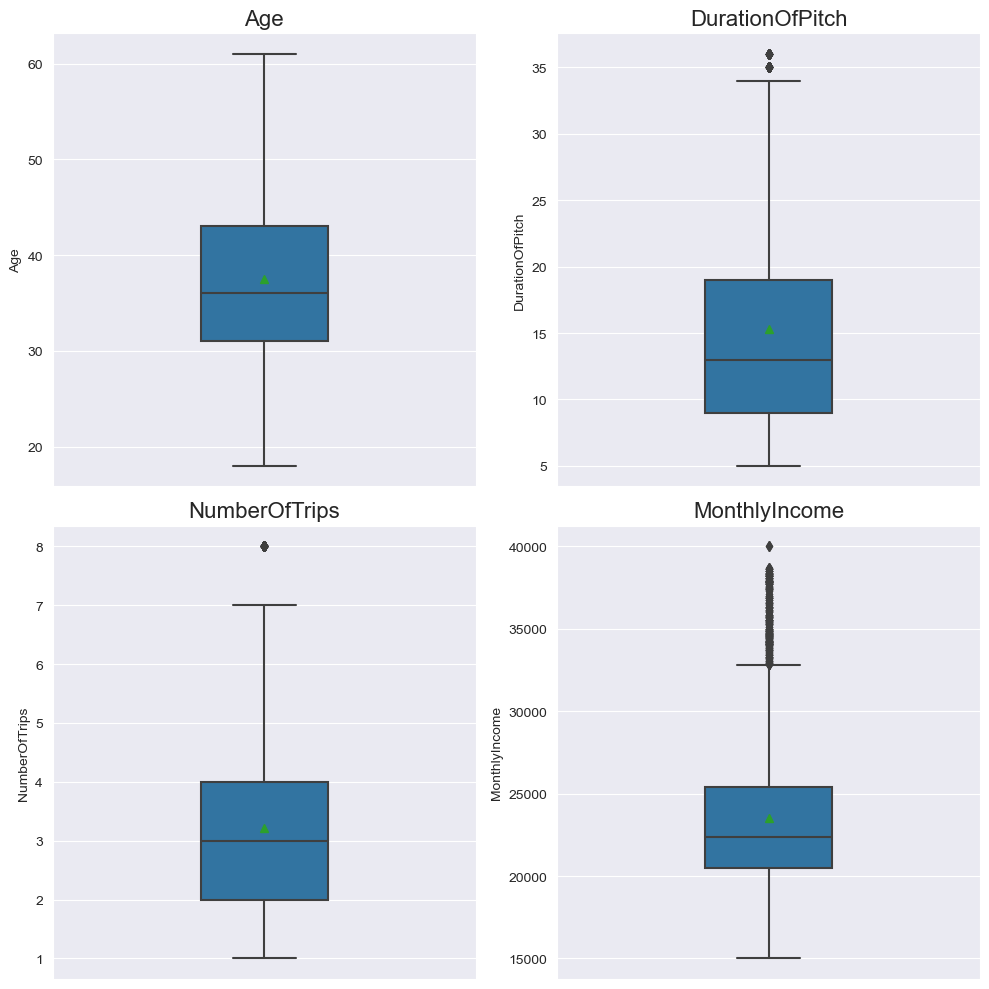

In [57]:
boxplot_overview(data[numerical_vars])

**Observation:**

* **DurationOfPitch**,  **NumberOfTrips** & **MonthlyIncome** - Predominantly have upper outliers.

### Histogram Distribution

Let's generate Histograms for each numerical variable and visually identify any its distributions.

In [58]:
def hist_box(data):
    """
    This function below generates a `box plot` & `histogram` 
    showing the `distribution of the numerical varible input`.
    * The function also checks for `outliers` and states the location (`lower`/`upper`)
    * The function also `generates an image file` of the plot.
    * The function takes the Pandas series as the input.
    * It creates a `subplot` with `box plot` and `histogram` distribution
    * It generates a vertical `line` to indicate the `mean`, `median` and `mode` on the histogram
    * It calculates the Inter Quartile Range using `Scipy Stats`
    * `sns.set_style` - sets the Seaborn theme
    * `nrows` - sets the shape of the subplot
    * `gridspec_kw` - configures the ratio of the size of the plots
    * `figsize` - indicates the size of the plot
    * `sns.reset_defaults()` - resets Seaborn themes and settings to default
    
    """

    # Get name of series
    name = data.name
    sns.set_style("darkgrid")
    f, axes = plt.subplots(nrows=2,
                           gridspec_kw={"height_ratios": (1, 3)})
    sns.boxplot(data, showmeans=True, color='m', ax=axes[0])
    sns.distplot(data, bins=15, ax=axes[1], color='deepskyblue', kde=False)
    axes[1].axvline(data.mean(), color='green', linestyle='--', label="mean")
    axes[1].axvline(data.median(), color='red', linestyle='-', label="median")
    axes[1].axvline(data.mode()[0], color='black', linestyle='-', label="mode")
    plt.legend(("mean", "median", "mode"), fontsize=12)
    plt.suptitle("Distribution of {}".format(name), fontsize=22)
    plt.tight_layout()
    plt.show()

    # Outlier check
    IQR = spy.stats.iqr(data, nan_policy="omit")
    upper_fence = data.quantile(0.75) + 1.5 * IQR
    lower_fence = data.quantile(0.25) - 1.5 * IQR
    upper_outliers = data[data > upper_fence].count()
    lower_outliers = data[data < lower_fence].count()
    print(
        f"The '{name}' distribution has '{lower_outliers}' lower outliers and '{upper_outliers}' upper outliers."
    )

    # Line separator
    print('--' * 55)

---

**Plot the distribution of all numerical variables**

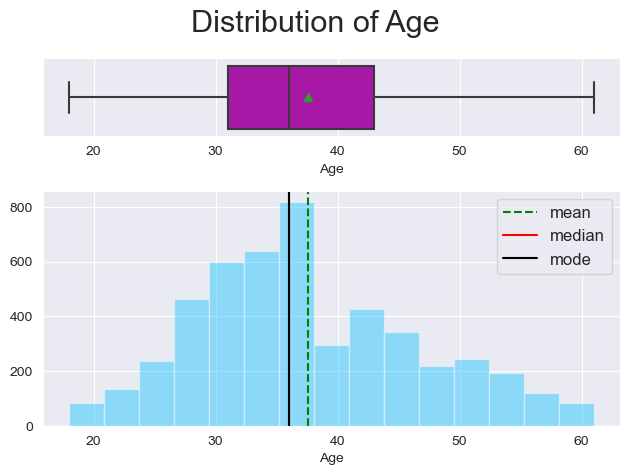

The 'Age' distribution has '0' lower outliers and '0' upper outliers.
--------------------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

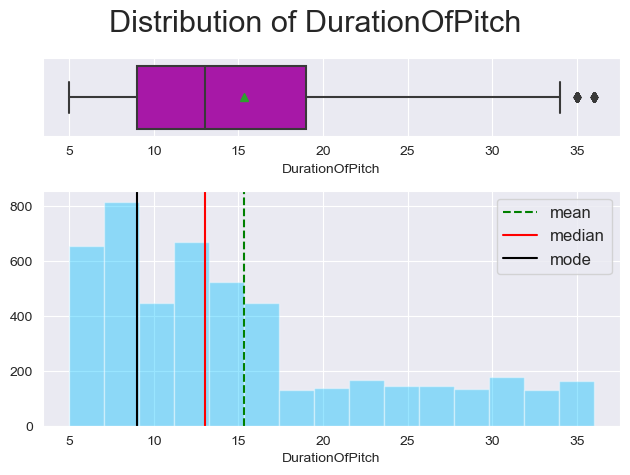

The 'DurationOfPitch' distribution has '0' lower outliers and '112' upper outliers.
--------------------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

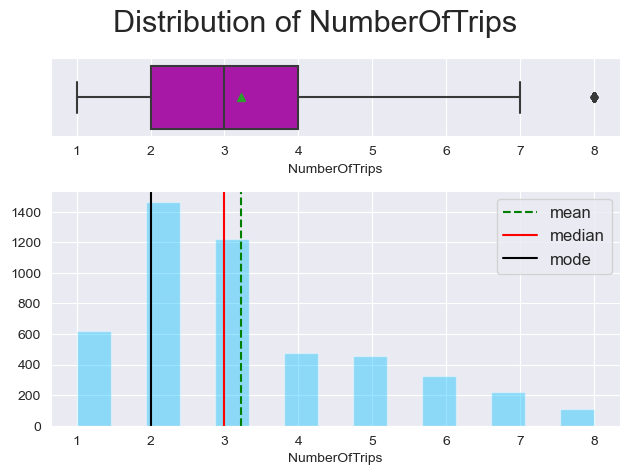

The 'NumberOfTrips' distribution has '0' lower outliers and '109' upper outliers.
--------------------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

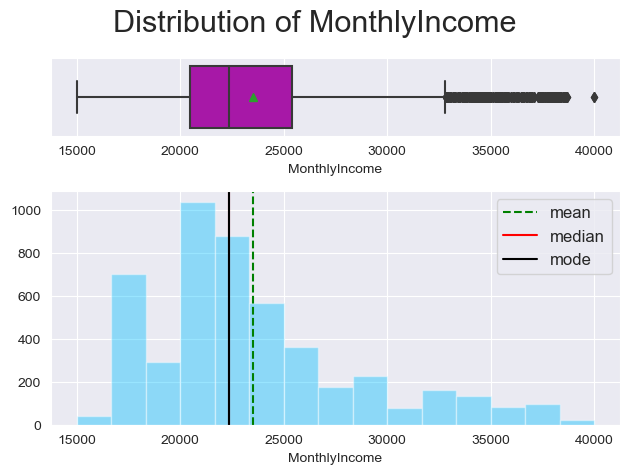

The 'MonthlyIncome' distribution has '0' lower outliers and '373' upper outliers.
--------------------------------------------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

In [59]:
for each_var in data[numerical_vars].columns:
    hist_box(data=data[each_var])
    plt.figure()
    plt.show()

**Observation:**
* The `Age` distribution is somewhat normal
* The `DurationOfPitch`, `NumberOfTrips`  & `MonthlyIncome` distributions are right skewed.

---

## Categorical Variables

We shall use bar chart to represent the categorical variables.

In [60]:
def bar_chart(data):
    """
    This function below generates a `bar chart` showing
    the `distribution of the categorical varible input`.
    * The function also `generates an image file` of the plot.
    * The function takes the Pandas series as the input.
    * It `computes the frequency of each unique element` and 
      displays the distribution of the elements to in horizontal bars.
    * The `percentage of each bar` is also calculated and placed to 
      the right end of each bar.
    * `sns.despine()` - removes the upper and right border of the chart
    * For each horizontal bar the width is calculated as a percentage of
      the entire quanta of datapoints.
    * The percentage is annotated to the each bar by plotting the cardinal locations.

    """
    
    # Create a horizontal count plot while sorting variables in descending order
    g=sns.countplot(y=data)
    # Remove the top and right spines from plot
    sns.despine()
    # length of the column
    col_length = len(data) 
    for p in g.patches:
        # percentage of each class of the category
        percentage = '{:.1f}%'.format(100 * p.get_width()/col_length)
        # width of the plot
        x = p.get_x() + p.get_width() + 0.02
        # height of the plot
        y = p.get_y() + p.get_height()/2
        # annotate the percentage
        g.annotate(percentage, (x, y), size = 12) 
        plt.title("Distribution of {}".format(data.name),loc="center",fontsize = 22)
    plt.show()
    # Line separator
    print('--'*55)


---

**Plot the distribution of all categorical variables**

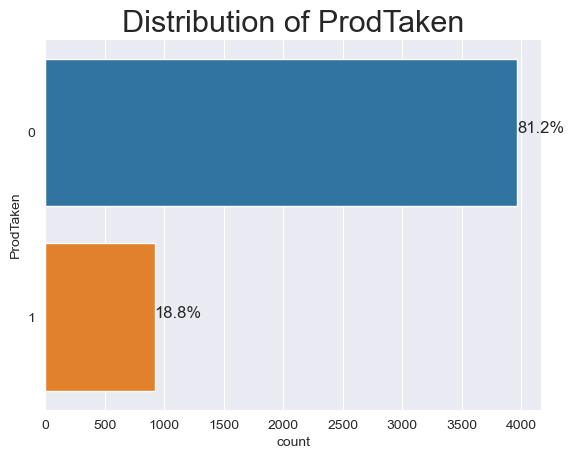

--------------------------------------------------------------------------------------------------------------


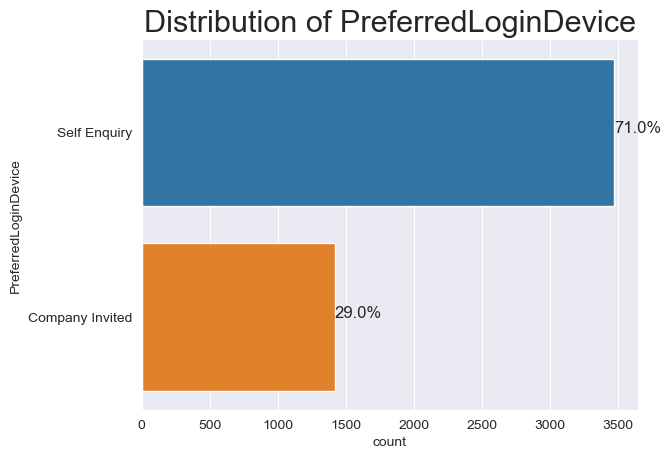

--------------------------------------------------------------------------------------------------------------


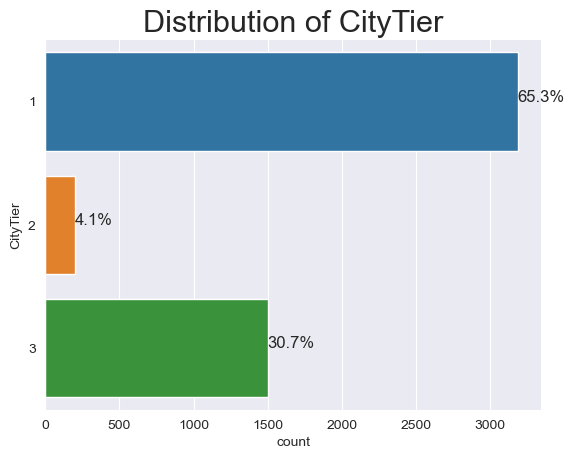

--------------------------------------------------------------------------------------------------------------


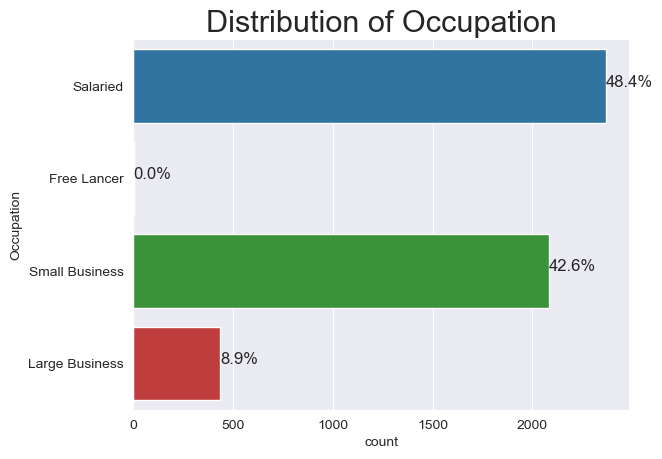

--------------------------------------------------------------------------------------------------------------


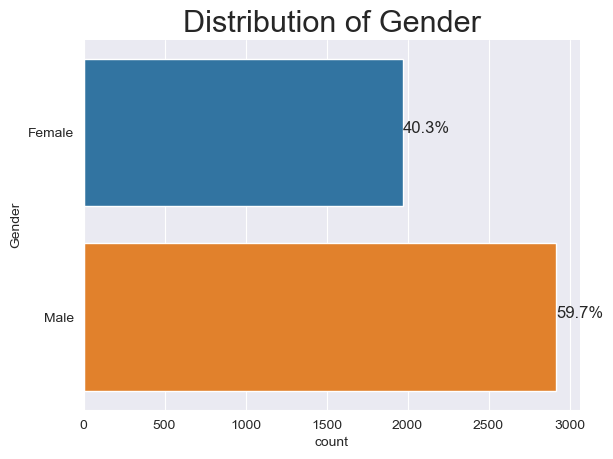

--------------------------------------------------------------------------------------------------------------


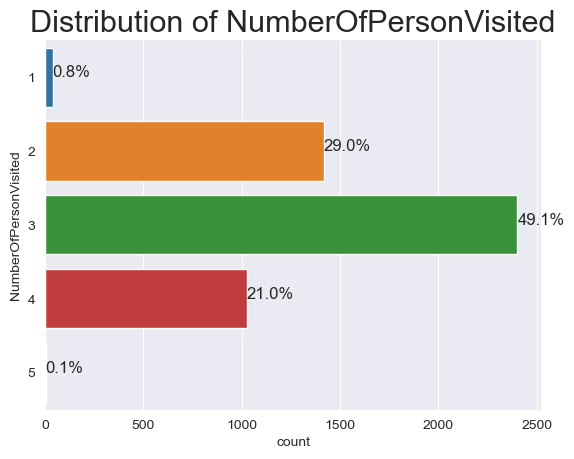

--------------------------------------------------------------------------------------------------------------


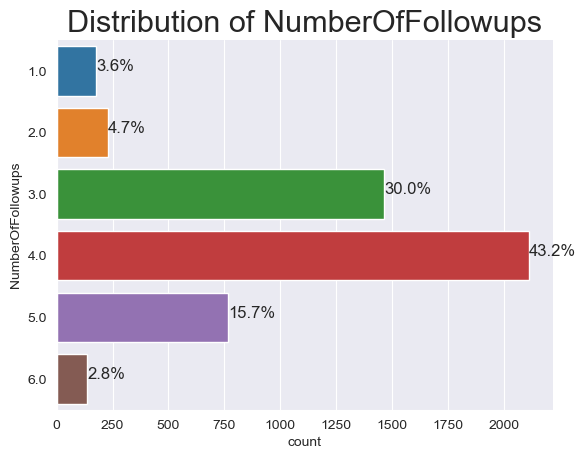

--------------------------------------------------------------------------------------------------------------


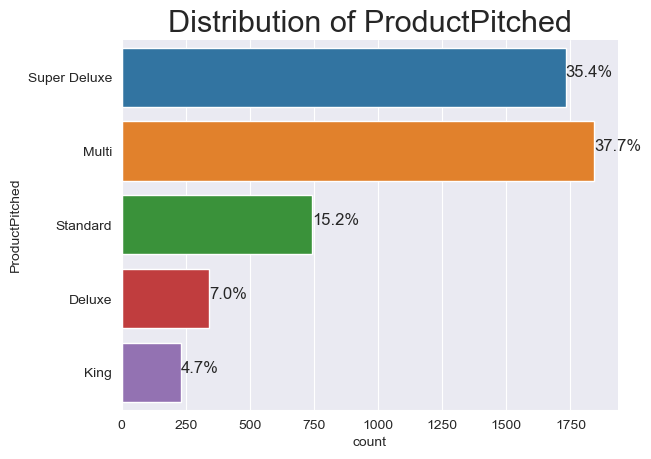

--------------------------------------------------------------------------------------------------------------


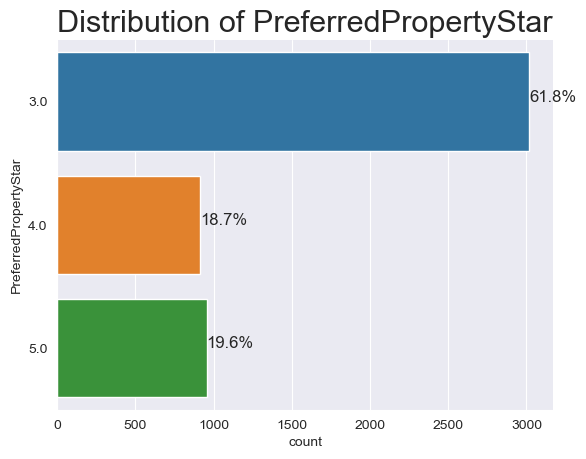

--------------------------------------------------------------------------------------------------------------


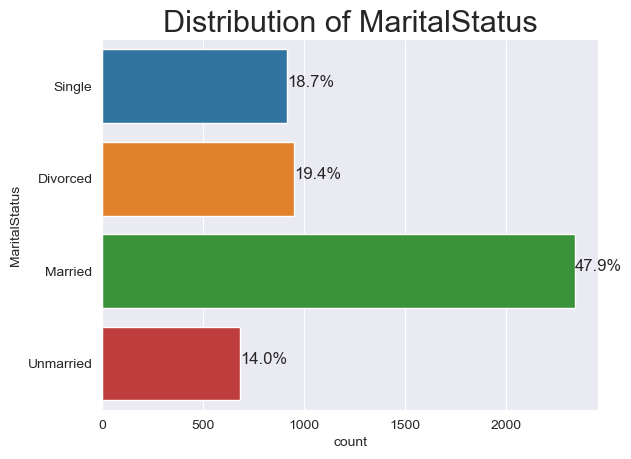

--------------------------------------------------------------------------------------------------------------


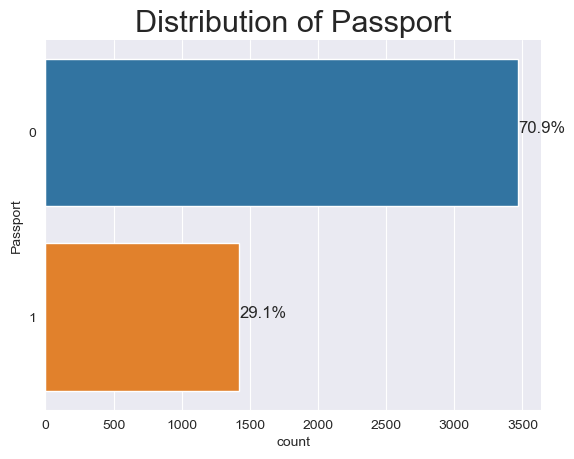

--------------------------------------------------------------------------------------------------------------


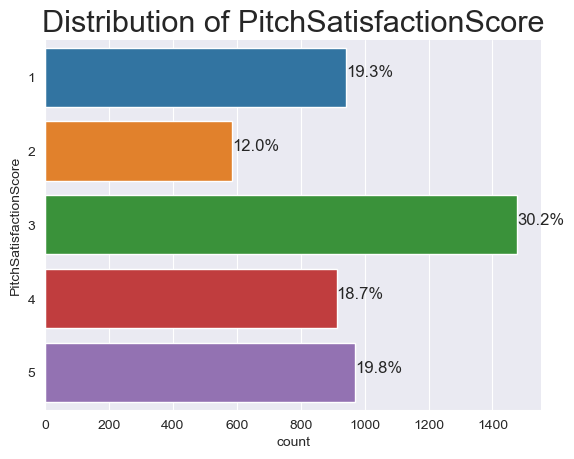

--------------------------------------------------------------------------------------------------------------


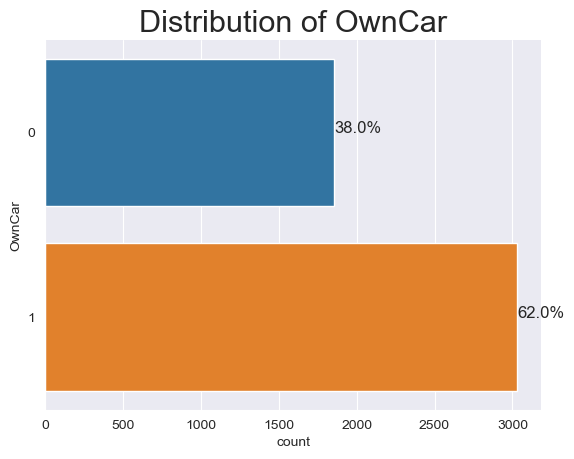

--------------------------------------------------------------------------------------------------------------


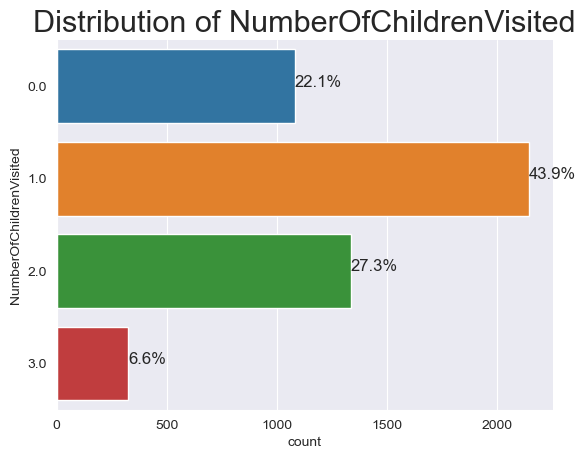

--------------------------------------------------------------------------------------------------------------


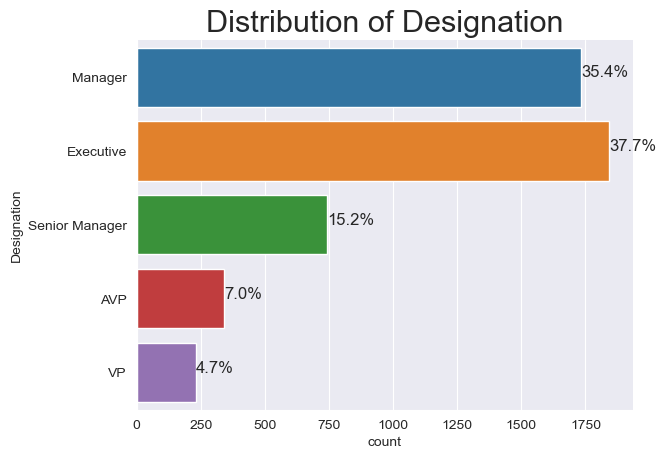

--------------------------------------------------------------------------------------------------------------


In [61]:
for each_var in data[categorical_vars].columns:
    plt.figure()
    bar_chart(data=data[each_var])

**Observations:**
* 18.8% of the customers purchased the package last year
* The customers' most `PreferredLoginDevice` was "Self Enquiry" (71%)
* Customers preferred CityTier 1 more than twice as CityTeir 3.
* Majority of the customers' `Occupuation` was 'Salaried' (48.4%). 'Small Business' (42.6%) was close second.
* Customers were predominately `Male` (59.7%)
* Majority of `NumberOfPersonVisited` were between 2-4, where 3 was the most (49%)
* Majority of `NumberOfFollowups` were 4 (43.2%), close second of 3 (30%).
* 'Super Deluxe' & 'Multi' were the majority of the `ProductPitched`. Cumulative (73.1%)
* Customer preferred `PreferredPropertyStar` of 3 (61.8%)
* Majority of the customers `MaritalStatus` was 'Married' (47.9%)
* Majority of the customers did not have `Passport`(70.9%)
* 68.7% of customers had `PitchSatisfactionScore` of 3 and greater. Majority was 3 (30.2%)
* Majority of the customers  `OwnCar`(62%)
* 77.8% of customers visited the travel company with their children.
* 'Manager' & 'Executive' were the majority of the customers' `Designation` (73.1%).

---

# Numerical Correlation Analysis

Let's check to see to see if there are correlations between the numerical variables.

## Heat Map

**Pearson**

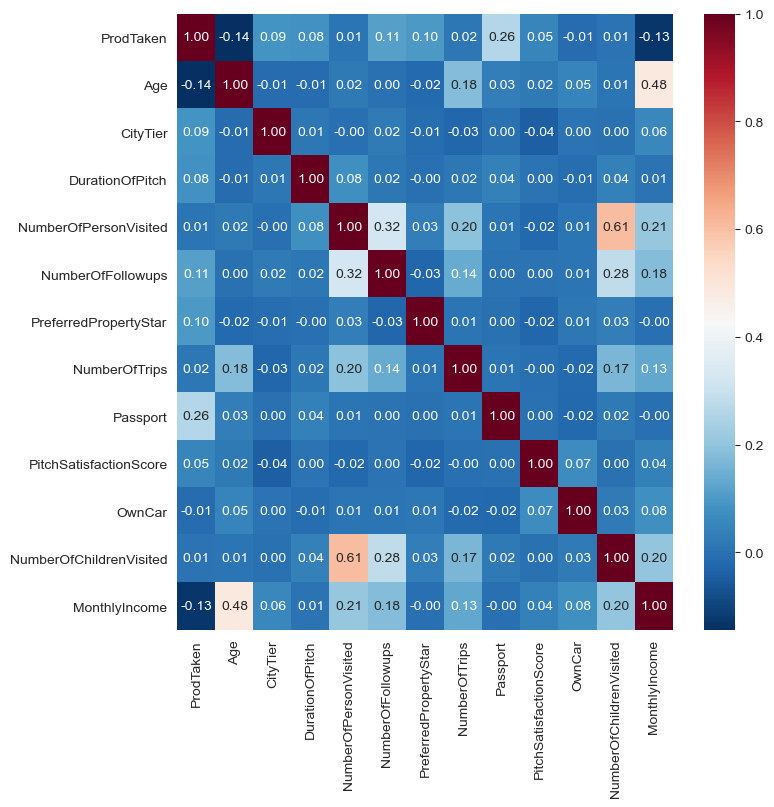

In [62]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(method='pearson'), annot=True, fmt=".2f", cmap='RdBu_r')
plt.yticks(rotation=0)
plt.show()

**Spearman**

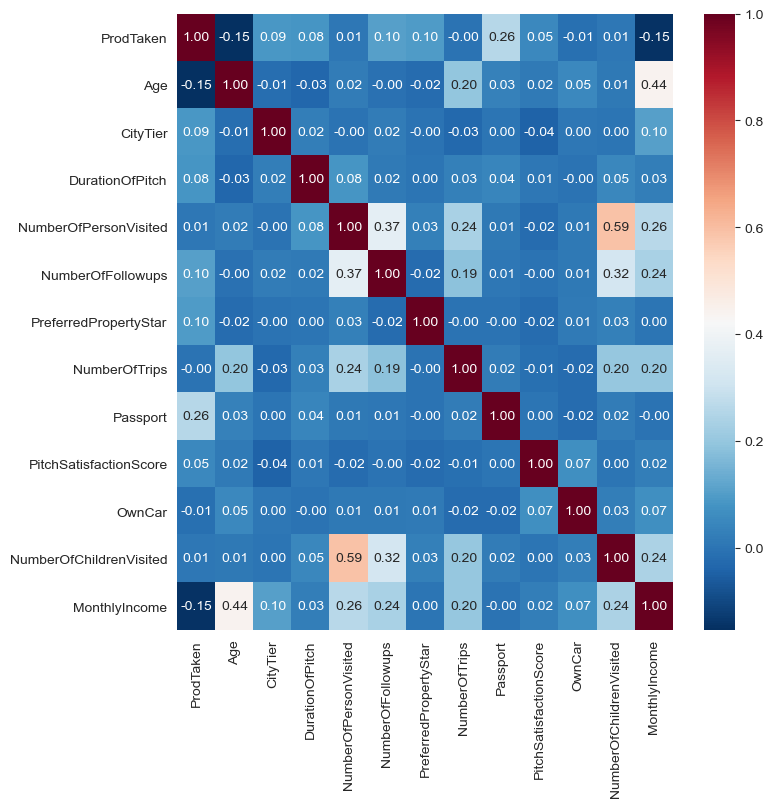

In [63]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(method='spearman'), annot=True, fmt=".2f", cmap='RdBu_r')
plt.yticks(rotation=0)
plt.show()

In [64]:
def pearson_corr_summary(df, bound):
    """
    This function below generates a list of Pearson correlation
    values bounded by the limit value supplied.
    
    * It requires the dataframe name `df` and `bound`
    * The correlaton values which equal or greater than (+VE) bound
      and less than or equal to the (-VE) bound are displayed
    * The lead diagonal of 1 (correlation with variable and itself) is removed.
    * `df.corr(method = 'pearson')`  - Pearson correlation method.
    """

    # Pearson Correlation function
    corr = df.corr(method='pearson').unstack()
    # Correlation filter value
    corr_filter = corr[((corr >= bound) | (corr <= -bound)) & (corr != 1.0)]
    # Generate a summary while dropping duplicates.
    summary = corr_filter.sort_values(ascending=False).drop_duplicates()
    return summary


def spearman_corr_summary(df, bound):
    """
    This function below generates a list of Spearman correlation
    values bounded by the limit supplied.
    
    * It requires the dataframe name `df` and `bound`
    * The correlaton values which equal or greater than (+VE) bound
      and less than or equal to the (-VE) bound are displayed
    * The lead diagonal of 1 (correlation with variable and itself) is removed.
    * `df.corr(method = 'spearman')`  - Spearman correlation method.
    """

    # Spearman Correlation function
    corr = df.corr(method='spearman').unstack()
    # Correlation filter value
    corr_filter = corr[((corr >= bound) | (corr <= -bound)) & (corr != 1.0)]
    # Generate a summary while dropping duplicates.
    summary = corr_filter.sort_values(ascending=False).drop_duplicates()
    return summary

Let's use a limit of 0.4

In [65]:
pearson_corr_summary(data, .4)

NumberOfChildrenVisited  NumberOfPersonVisited    0.606321
MonthlyIncome            Age                      0.481767
dtype: float64

In [66]:
spearman_corr_summary(data, .4)

NumberOfChildrenVisited  NumberOfPersonVisited    0.593082
MonthlyIncome            Age                      0.442365
dtype: float64

**Observations:**  

There are not many significantly correlated variables
* **NumberOfPersonVisited** and **NumberOfChildrenVisited** are highly correlated with each other.
* **Age** and **MonthlyIncome** are moderately correlated with each other.

---

# Bivariate Analysis

## Bivariate Scatter Plots

Let's generate a pairplot of the numerical variables before we dive into the Numerical Variable Bivariate Analysis

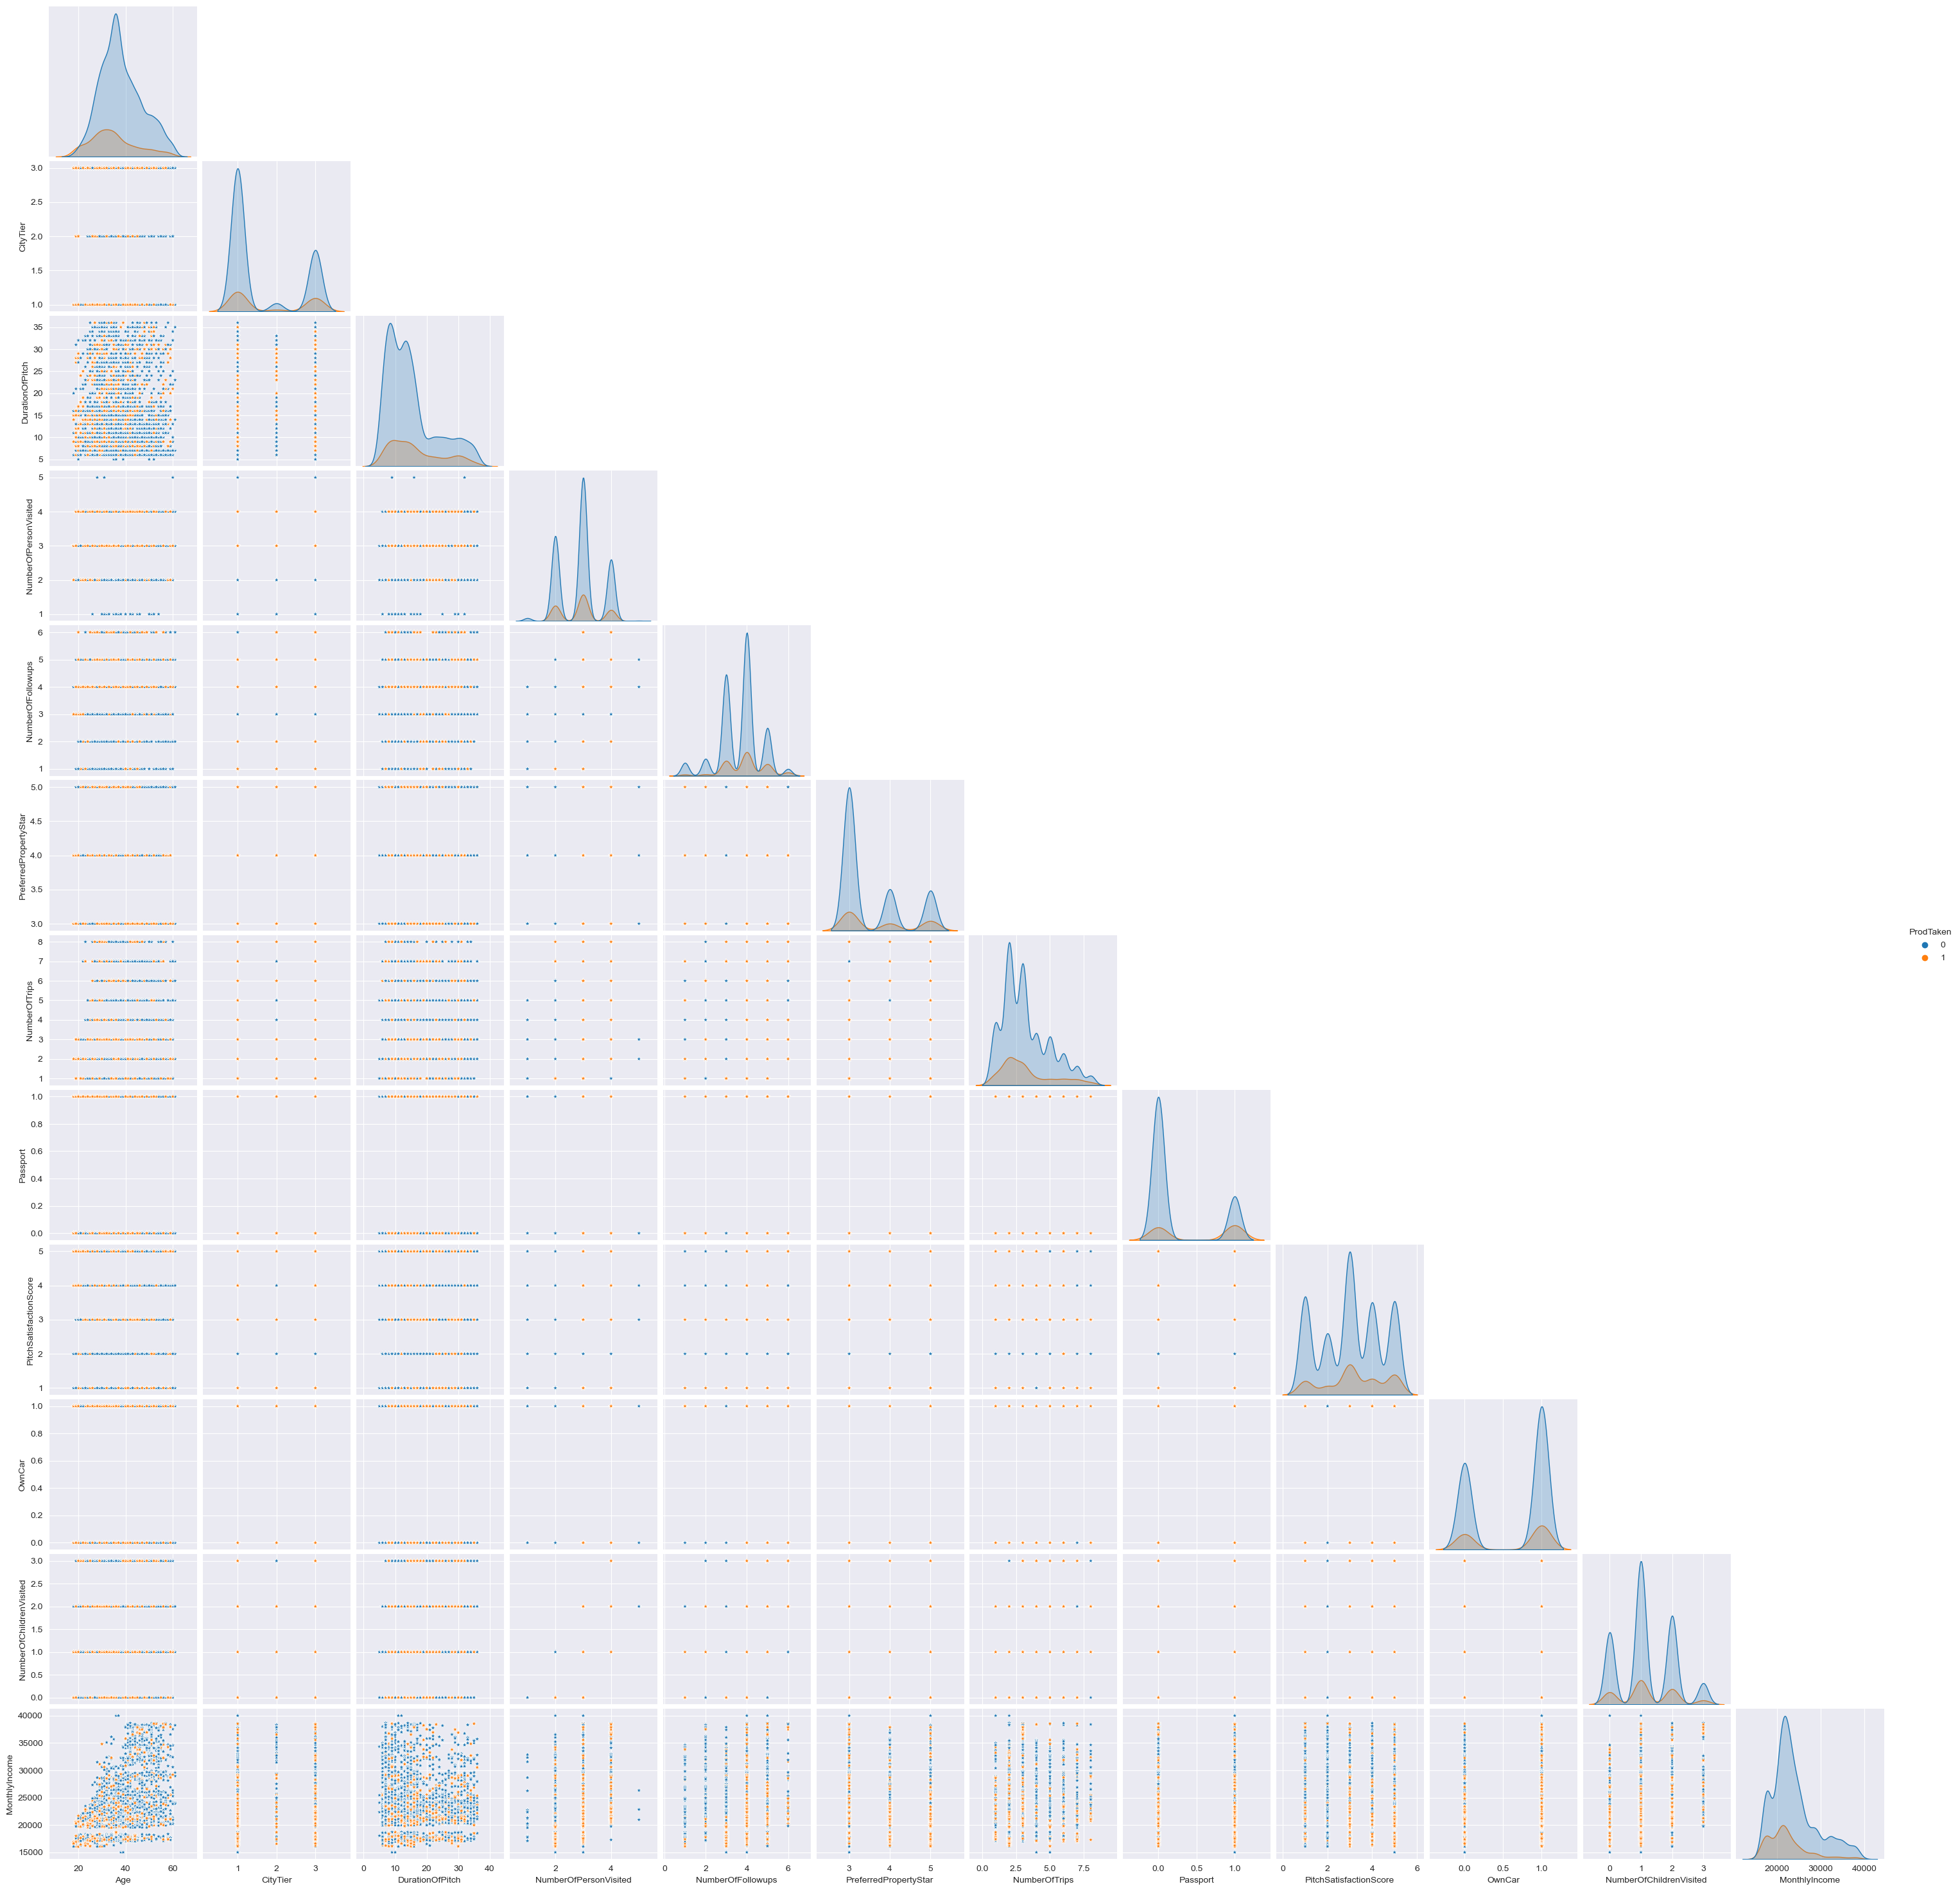

In [67]:
sns.pairplot(data,corner=True, hue="ProdTaken", markers="*");

There are no clear trends in the numerical pairplots

---

## Continuous Variable Exploration

### Numerical - Categorical

Let's define a function to generate numerical and categorical plots

In [68]:
def num_cat_plots(numerical_variable):
    """
    This function creates a list of the 
    categorical variables without the target varible.
    It then generates boxplots for the input
    numerical variable with each categorical variable
    to display the distribution.
    
    """
    cat_vars = data[categorical_vars].columns.to_list()
    cat_vars.remove('ProdTaken')
    for cat_var in cat_vars:
        sns.catplot(y=numerical_variable.name,
                    x=cat_var,
                    row="ProdTaken",
                    kind="box",
                    data=data,
                    showmeans=True,
                    height=2,
                    aspect=3)
        plt.show()
        # Line separator
        print('--' * 55)

#### Age

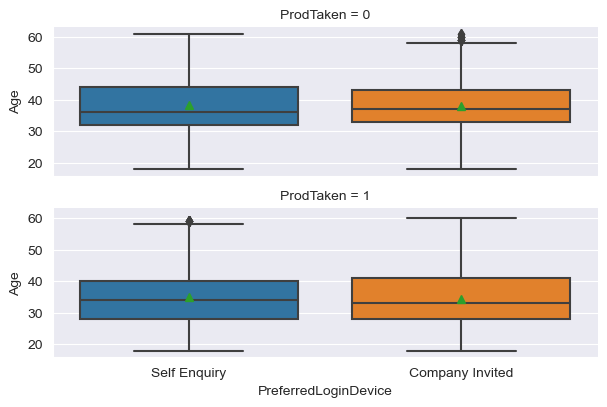

--------------------------------------------------------------------------------------------------------------


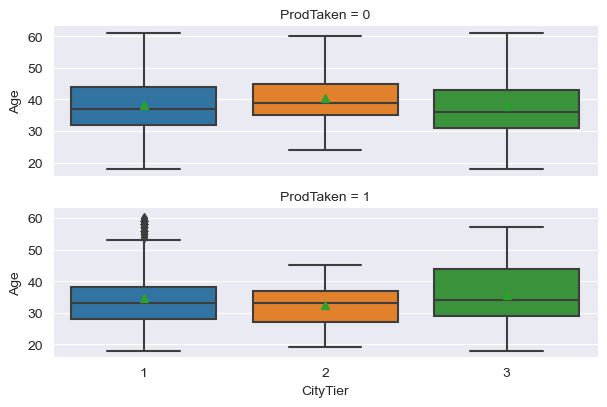

--------------------------------------------------------------------------------------------------------------


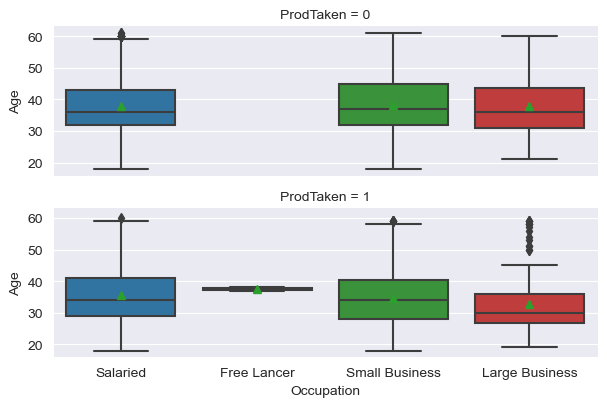

--------------------------------------------------------------------------------------------------------------


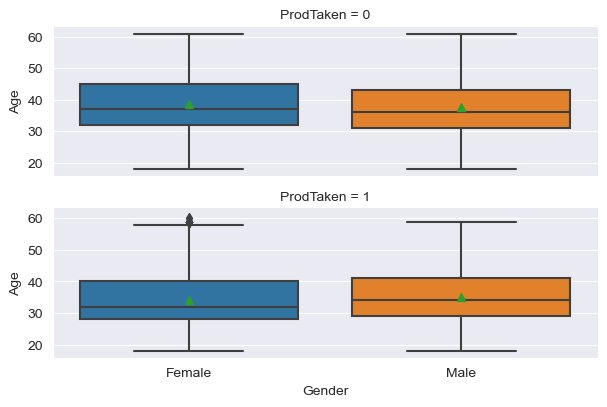

--------------------------------------------------------------------------------------------------------------


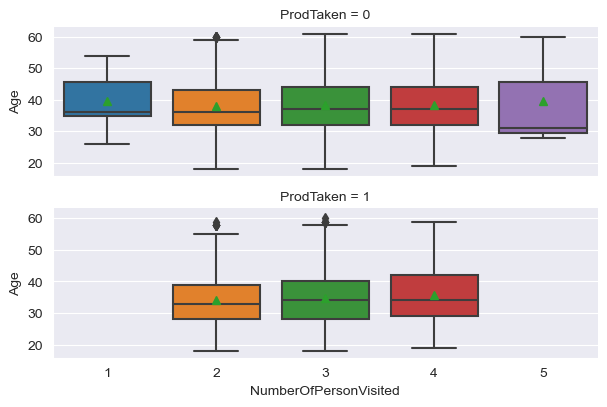

--------------------------------------------------------------------------------------------------------------


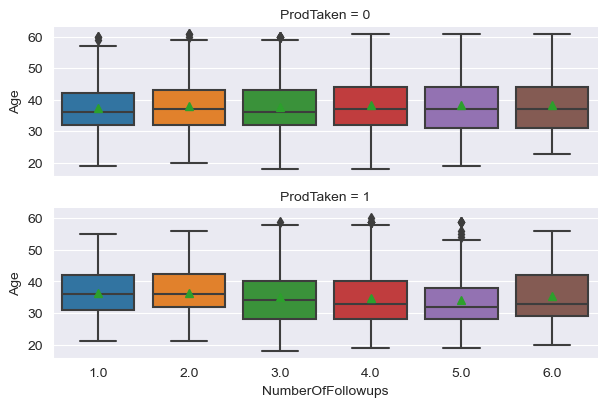

--------------------------------------------------------------------------------------------------------------


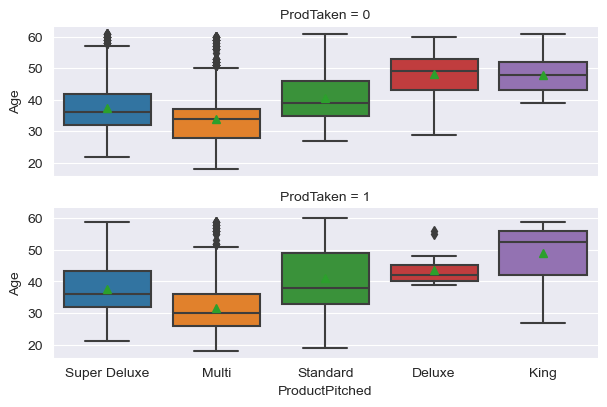

--------------------------------------------------------------------------------------------------------------


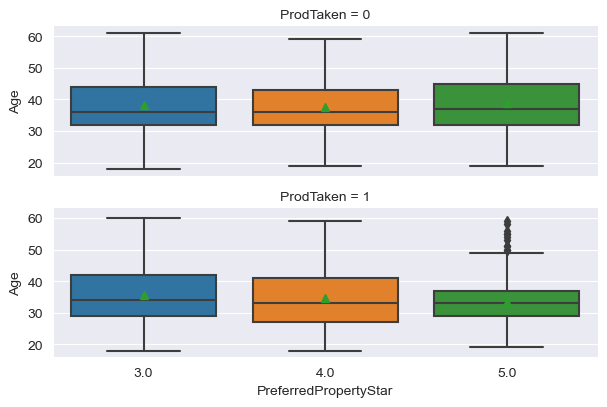

--------------------------------------------------------------------------------------------------------------


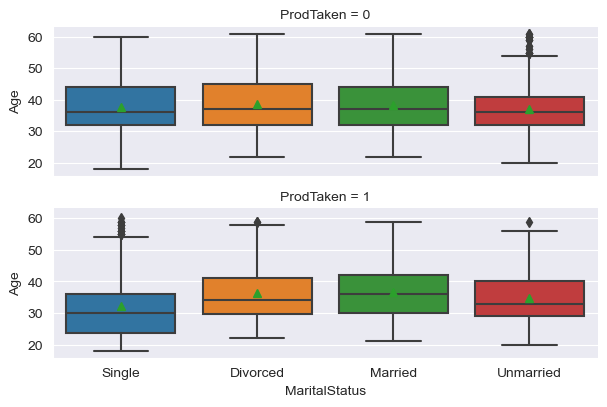

--------------------------------------------------------------------------------------------------------------


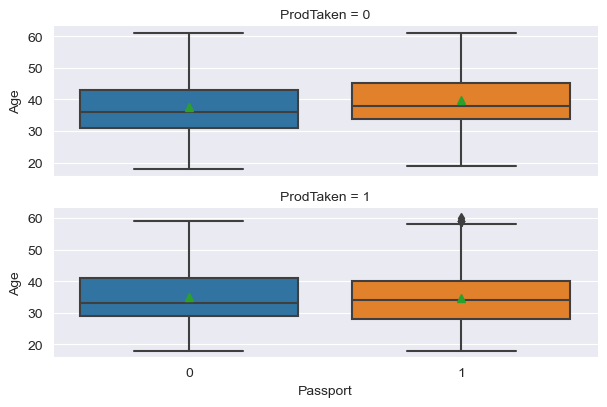

--------------------------------------------------------------------------------------------------------------


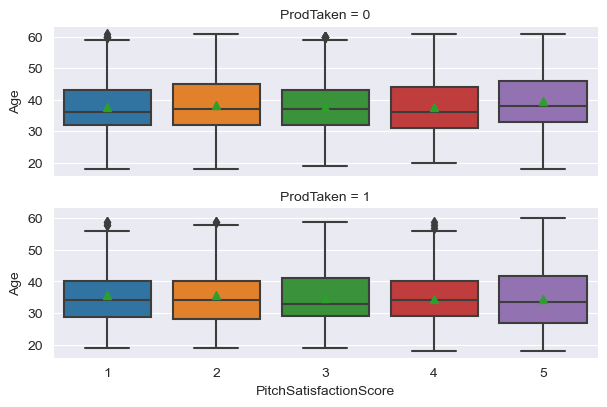

--------------------------------------------------------------------------------------------------------------


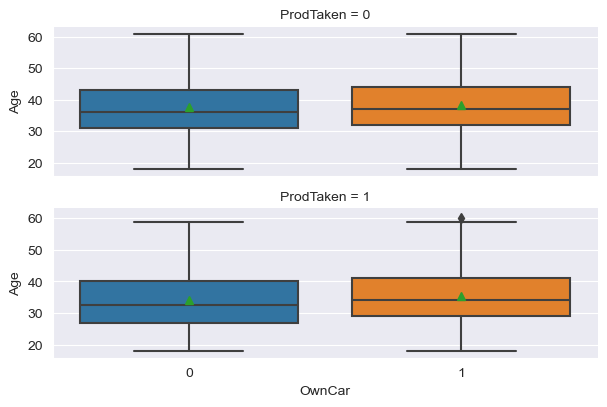

--------------------------------------------------------------------------------------------------------------


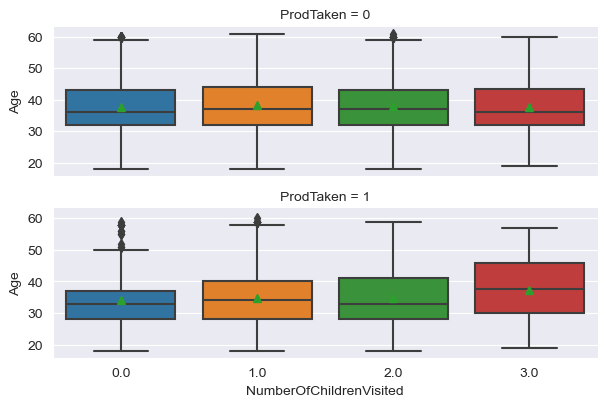

--------------------------------------------------------------------------------------------------------------


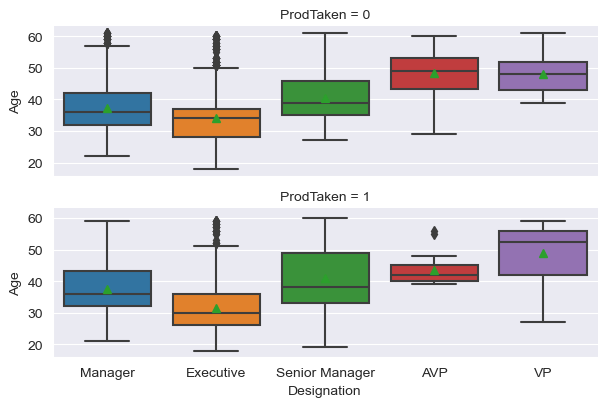

--------------------------------------------------------------------------------------------------------------


In [69]:
num_cat_plots(data.Age)

* **Age**
    * There is no significant difference in `PreferredLoginDevice`, `Gender`, `NumberOfPersonVisited`, `NumberOfFollowups`, `PreferredPropertyStar`, `Passport` , `PitchSatisfactionScore` , `OwnCar`
    * `CityTier` -  **3** appeals to wider age group than **1** or **2**
    * `Occupation`  - The **Large Business** customers comprised of a small age group from young to middle age adults.
    * `ProductPitched` - The younger customers were targeted with **Multi** while the oldest were **King**
    * `MaritalStatus` - The bulk of the younger customers were **Single** while the oldest were **Divorced**
    * `NumberOfChildrenVisited` - Customers with 3 children visited were oldest.
    * `Designation` - **VP** customers were the oldest while **Executive** were the youngest.

#### DurationOfPitch

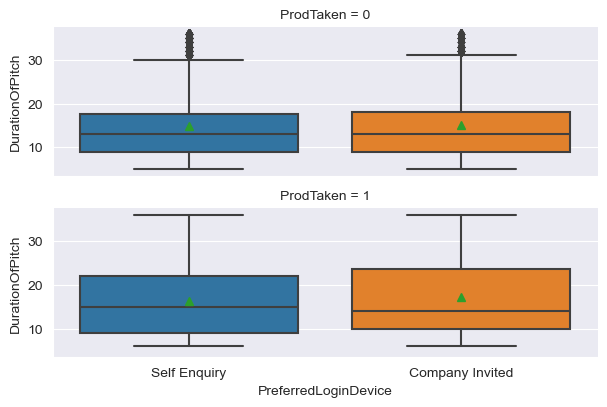

--------------------------------------------------------------------------------------------------------------


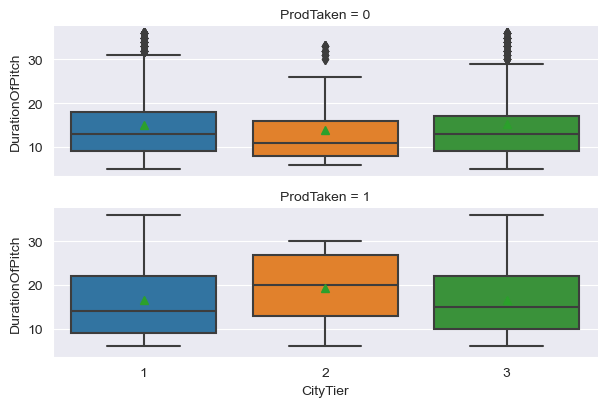

--------------------------------------------------------------------------------------------------------------


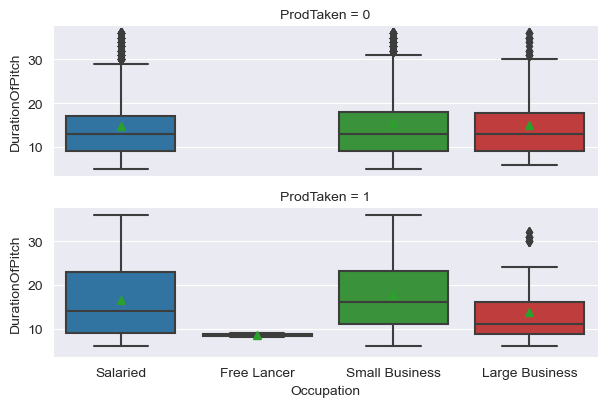

--------------------------------------------------------------------------------------------------------------


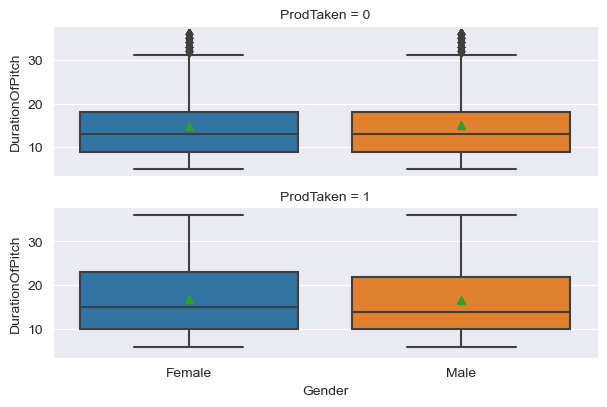

--------------------------------------------------------------------------------------------------------------


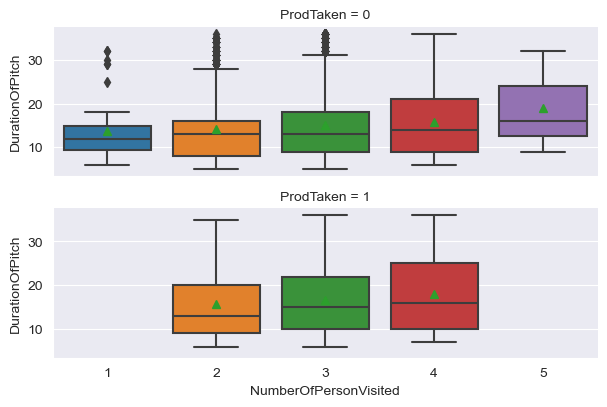

--------------------------------------------------------------------------------------------------------------


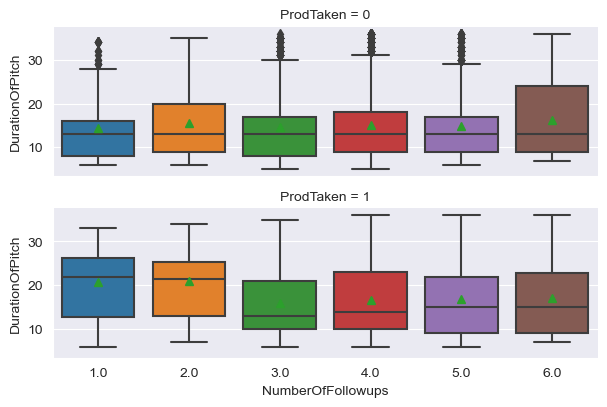

--------------------------------------------------------------------------------------------------------------


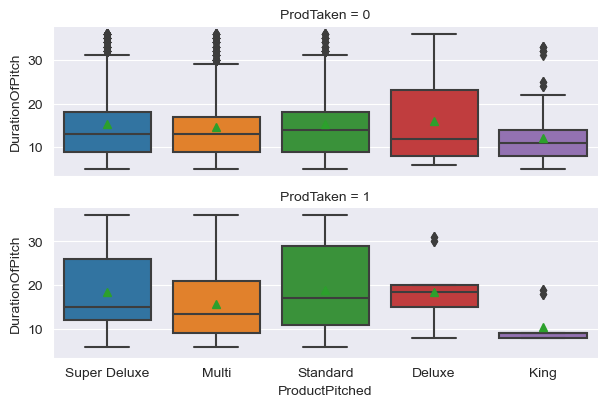

--------------------------------------------------------------------------------------------------------------


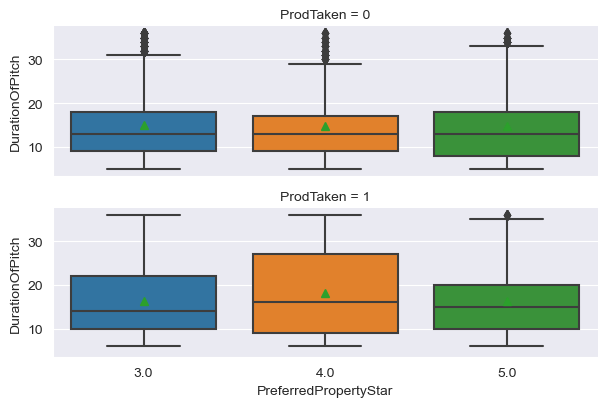

--------------------------------------------------------------------------------------------------------------


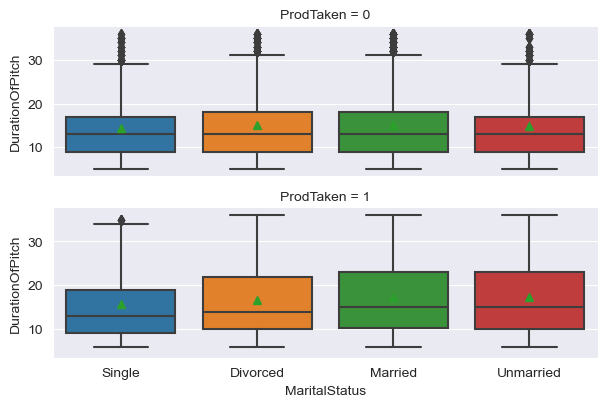

--------------------------------------------------------------------------------------------------------------


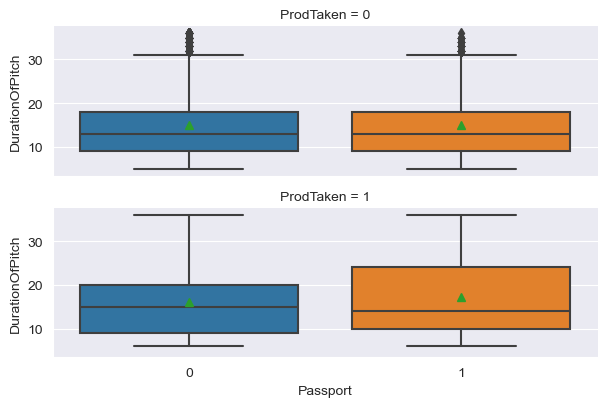

--------------------------------------------------------------------------------------------------------------


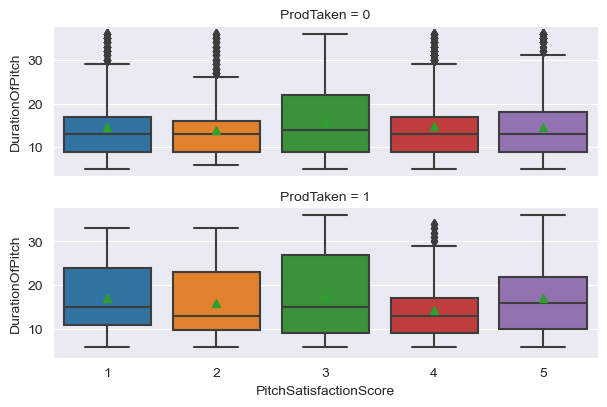

--------------------------------------------------------------------------------------------------------------


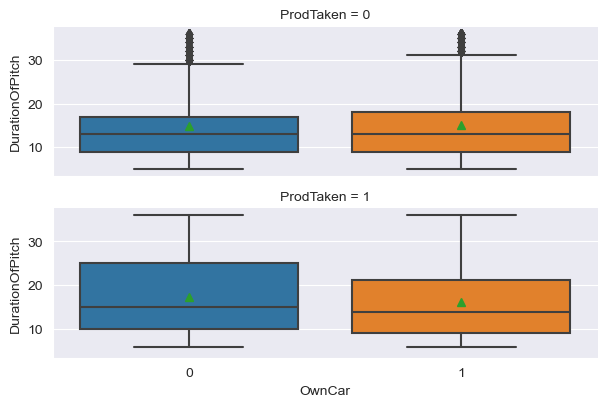

--------------------------------------------------------------------------------------------------------------


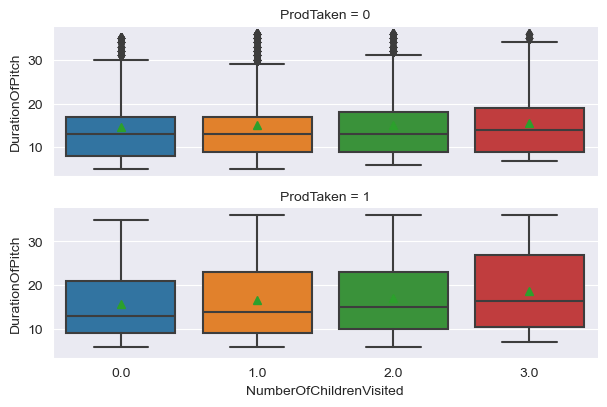

--------------------------------------------------------------------------------------------------------------


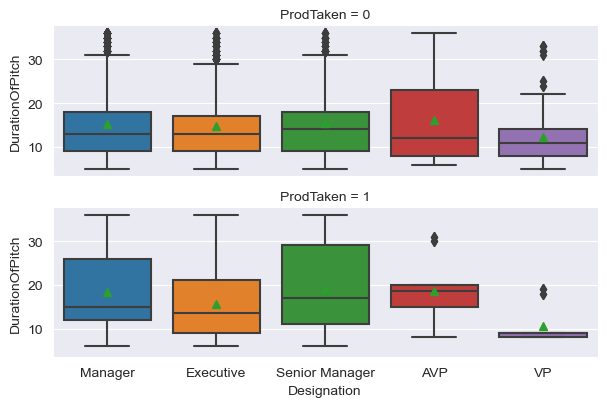

--------------------------------------------------------------------------------------------------------------


In [70]:
num_cat_plots(data.DurationOfPitch)

* **DurationOfPitch**
    * There is no significant difference in `PreferredLoginDevice`, `Gender`, `Passport`
    * `CityTier` -  **2** was pitched on average more than  **1** or **3**
    * `Occupation`  - **Free Lancer** were pitched for the least amount of time compared to other Occupations
    * `NumberOfPersonVisited` - Customers with more persons visiting were pitched longer. Possibly for more convincing or additional queries.
    * `NumberOfFollowups` - Average Pitch time decreased after two followups
    * `ProductPitched` - **Standard** entailed the longest pitches. **King** required the least time.
    * `PreferredPropertyStar` - 4 Star properties were pitched for the longest times. 5 Star the least.
    * `MaritalStatus` - **Single** were pitched for the shortest period compared to the other customers.
    * `PitchSatisfactionScore` - **3** rank was the given the longest time
    * `OwnCar` - Customers with a car were pitched for a longer period time.
    * `NumberOfChildrenVisited` - Customers with 3 children had longest pitch time.
    * `Designation` - **VP** customers required the shortest pitch time compared to the other customers.

#### NumberOfTrips

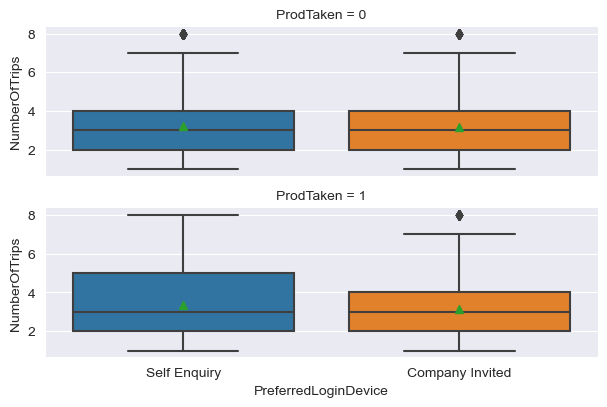

--------------------------------------------------------------------------------------------------------------


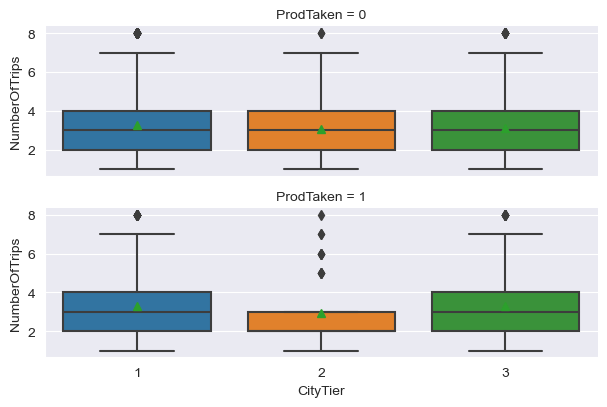

--------------------------------------------------------------------------------------------------------------


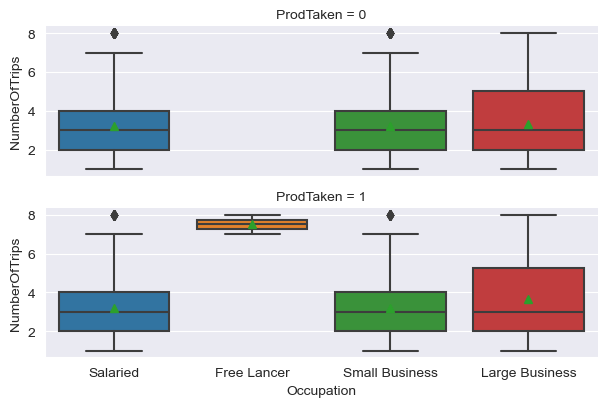

--------------------------------------------------------------------------------------------------------------


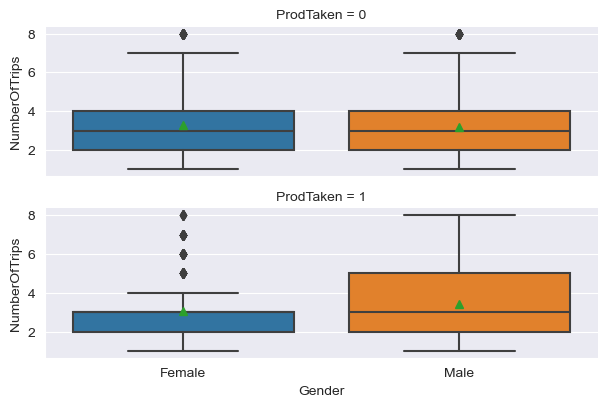

--------------------------------------------------------------------------------------------------------------


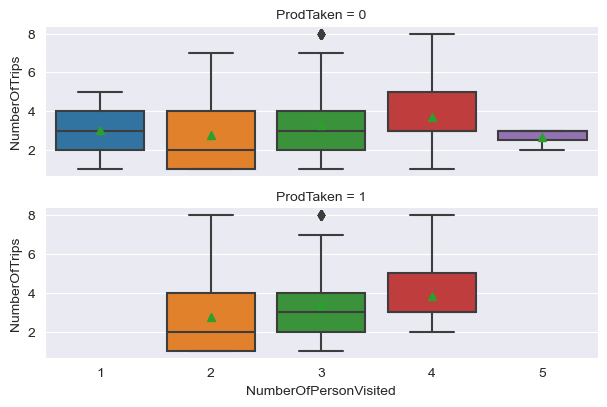

--------------------------------------------------------------------------------------------------------------


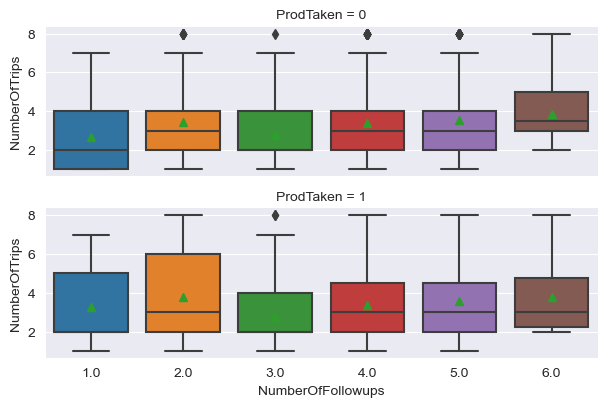

--------------------------------------------------------------------------------------------------------------


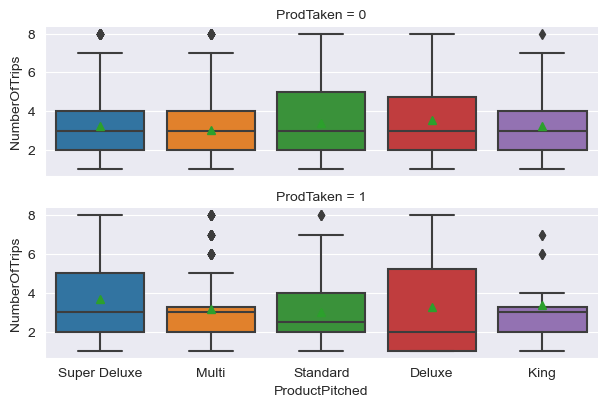

--------------------------------------------------------------------------------------------------------------


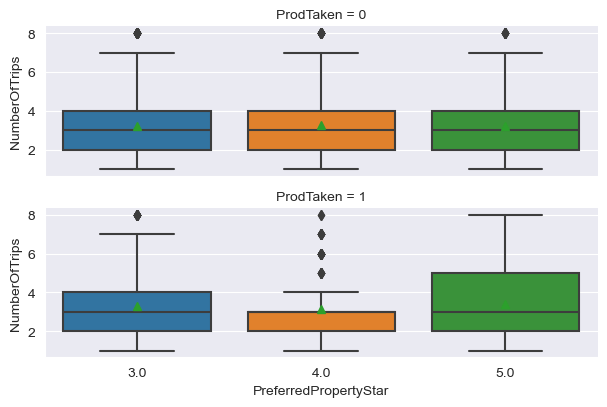

--------------------------------------------------------------------------------------------------------------


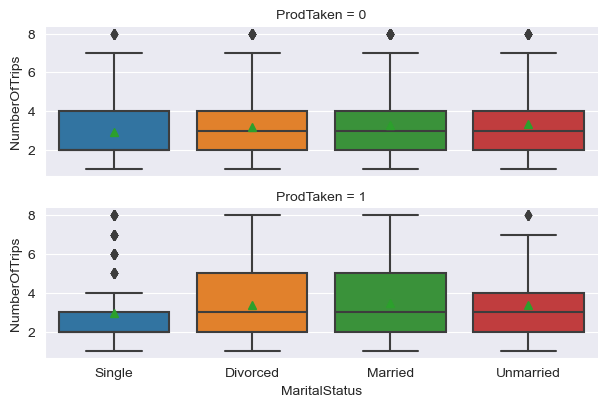

--------------------------------------------------------------------------------------------------------------


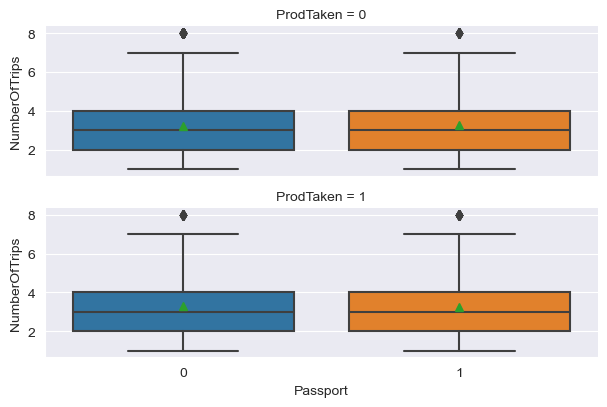

--------------------------------------------------------------------------------------------------------------


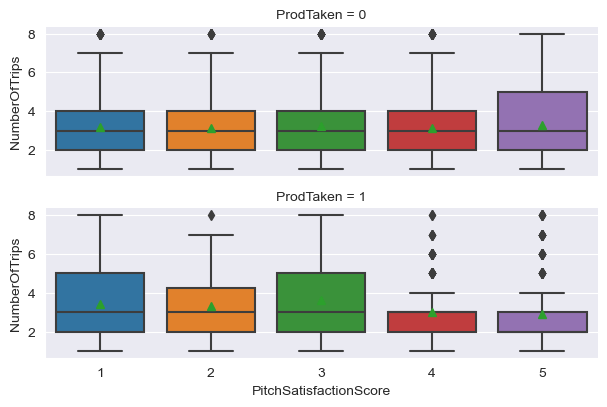

--------------------------------------------------------------------------------------------------------------


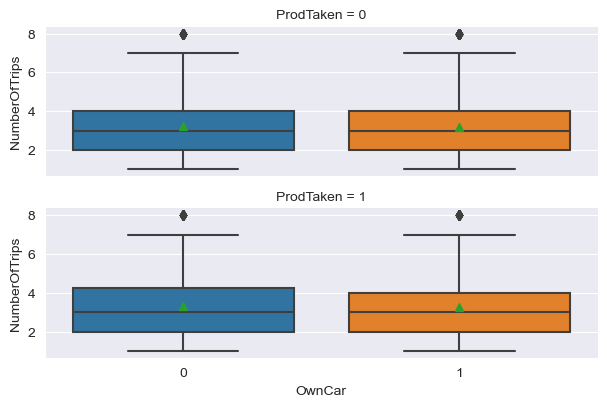

--------------------------------------------------------------------------------------------------------------


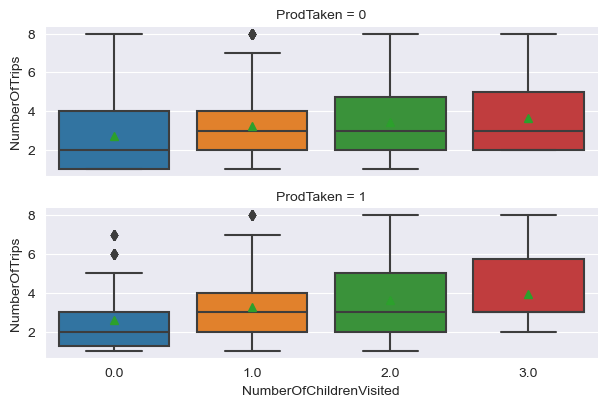

--------------------------------------------------------------------------------------------------------------


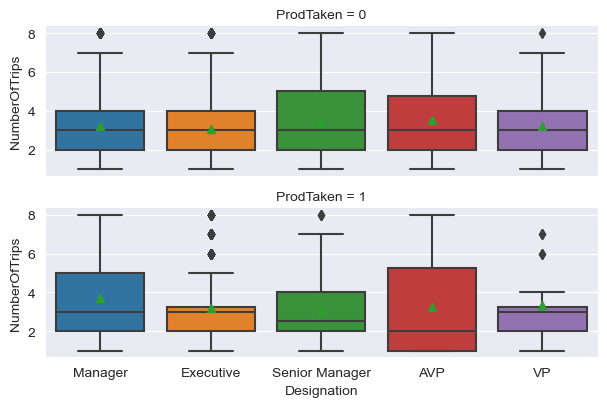

--------------------------------------------------------------------------------------------------------------


In [71]:
num_cat_plots(data.NumberOfTrips)

* **NumberOfTrips**
    * There is no significant difference in `PreferredLoginDevice`, `NumberOfFollowups`, `Passport`, `OwnCar`
    * `CityTier` -  **2** has the least number of trips
    * `Occupation`  - **Free Lancer** makes the most amount of trips compared to other Occupations
    * `Gender` - Male customers make more trips than Females
    * `NumberOfPersonVisited` - Customers with more persons visiting made more trips. Possibly more family trips.
    * `ProductPitched` - **Super Deluxe** entailed the most trips. **King** was the least.
    * `PreferredPropertyStar` - 4 Star properties had the least number of trips.
    * `MaritalStatus` - **Single** make the least number of trips compared to the other customers.
    * `PitchSatisfactionScore` - **3** & **4** rank has the least number of trips.
    * `NumberOfChildrenVisited` - Number of trips increased with more children.
    * `Designation` - **VP** customers made the least amount of trips compared to the other customers.

#### MonthlyIncome

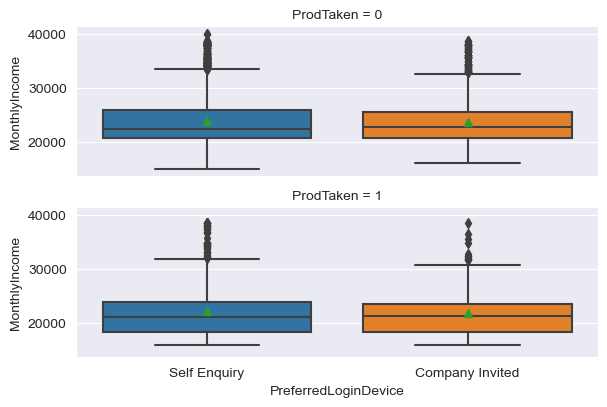

--------------------------------------------------------------------------------------------------------------


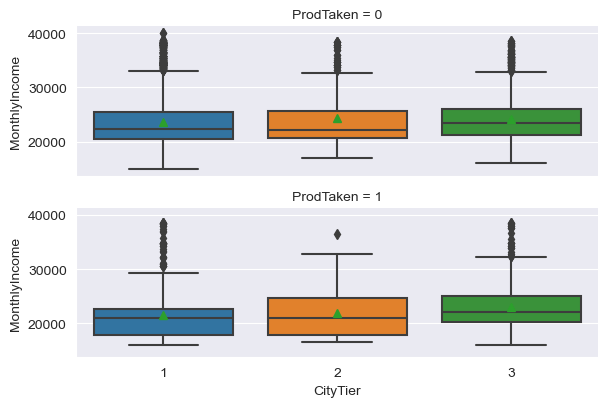

--------------------------------------------------------------------------------------------------------------


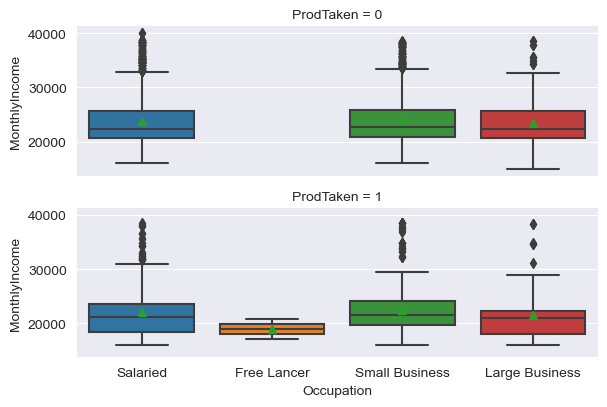

--------------------------------------------------------------------------------------------------------------


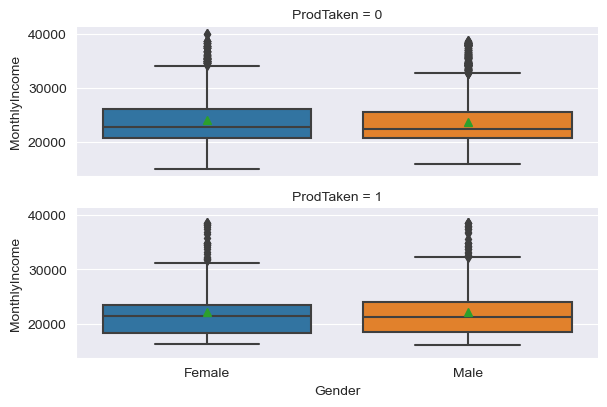

--------------------------------------------------------------------------------------------------------------


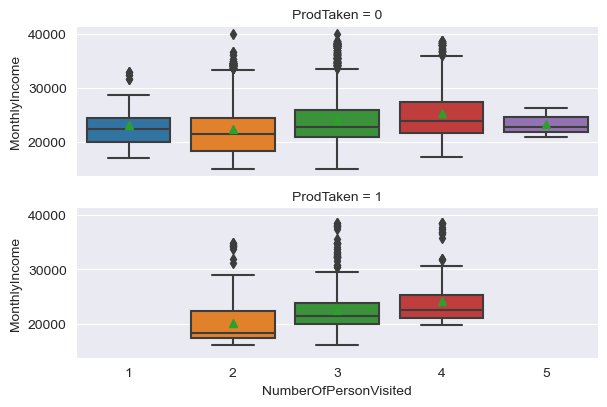

--------------------------------------------------------------------------------------------------------------


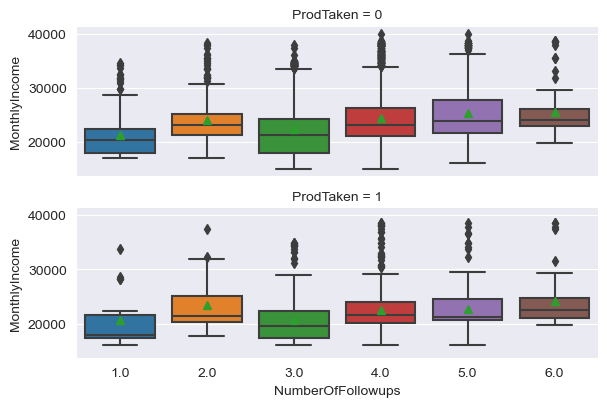

--------------------------------------------------------------------------------------------------------------


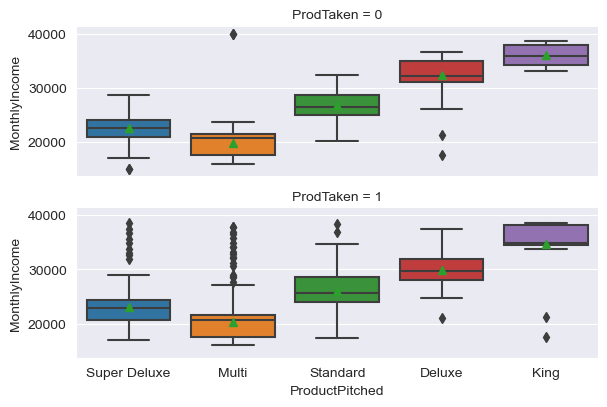

--------------------------------------------------------------------------------------------------------------


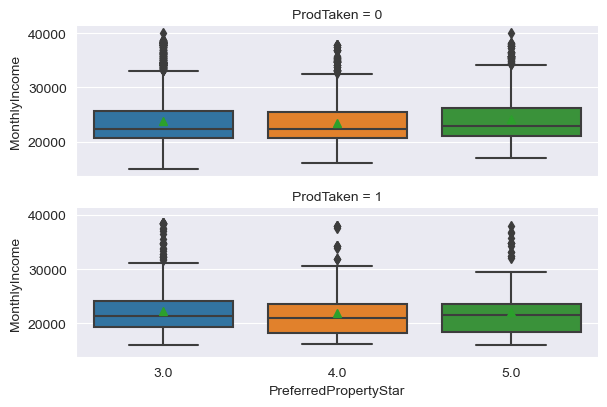

--------------------------------------------------------------------------------------------------------------


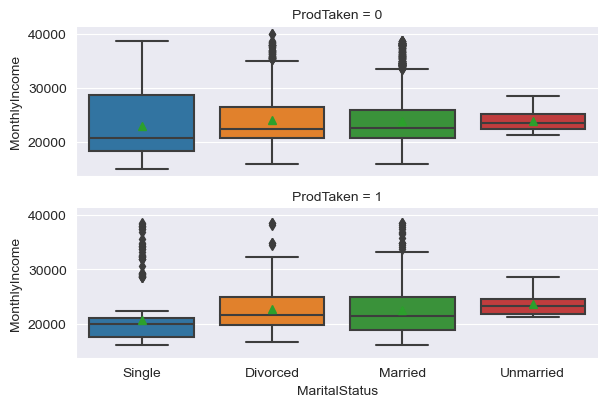

--------------------------------------------------------------------------------------------------------------


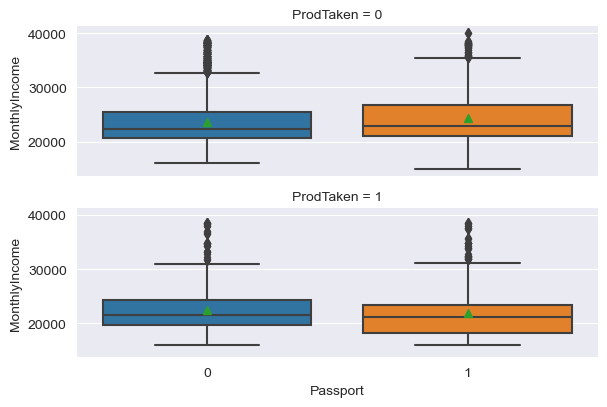

--------------------------------------------------------------------------------------------------------------


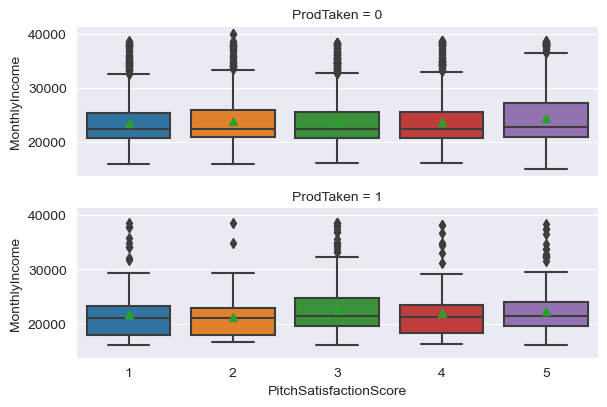

--------------------------------------------------------------------------------------------------------------


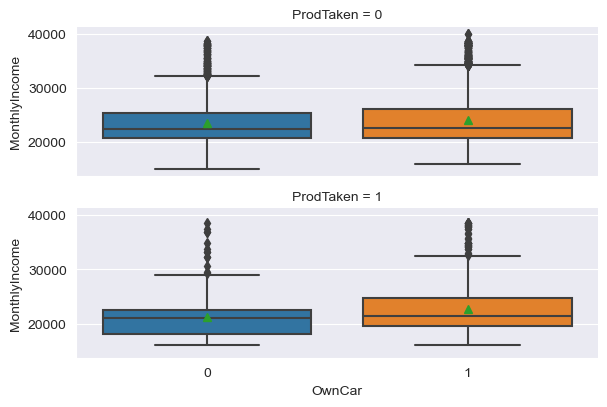

--------------------------------------------------------------------------------------------------------------


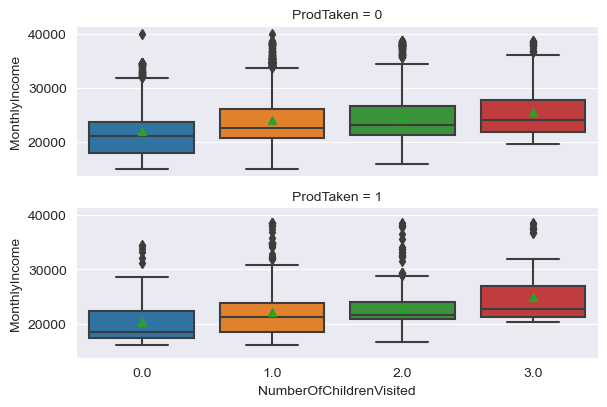

--------------------------------------------------------------------------------------------------------------


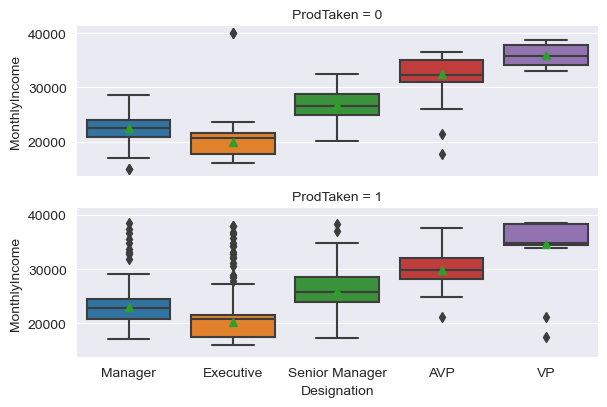

--------------------------------------------------------------------------------------------------------------


In [72]:
num_cat_plots(data.MonthlyIncome)

* **MonthlyIncome**
    * There is no significant difference in `PreferredLoginDevice`, `Gender`,`PreferredPropertyStar`,  `Passport`,  `PitchSatisfactionScore`,  
    * `CityTier` -  **1** had the lowest income.
    * `Occupation`  - **Free Lancer** makes the least income.
    * `NumberOfPersonVisited` - Customers with more persons visiting made more income.
    * `NumberOfFollowups` - Customers with the lowest income were contacted the least.
    * `ProductPitched` - **Multi** was pitched to the lowest income range while **King** was to the highest.
    * `MaritalStatus` - **Single** had the lowest income compared to the other customers.
    * `OwnCar` - Customers who own a car made slightly higher income.
    * `NumberOfChildrenVisited` - Income increased with more children.
    * `Designation` - **VP** customers had the highest income. **Executive** had the lowest.

---

 ## Categorical Variable Exploration

Let's define a function to generate categorical variables vs target variable plots

In [73]:
def categ_target_plots(target_variable):
    """
    This function creates a list of the 
    categorical variables without the target varible.
    It then generates countplots for the input
    target variable with each categorical variable
    to display the distribution.
    
    """
    cat_vars = data[categorical_vars].columns.to_list()
    cat_vars.remove(target_variable.name)

    for cat_var in cat_vars:
        sns.catplot(data=data,
                    y=cat_var,
                    hue=target_variable.name,
                    kind="count")
        plt.title("{} by {}".format(cat_var, target_variable.name),
                  loc="center",
                  fontsize=16)
        plt.show()
        # Line separator
        print('--' * 55)

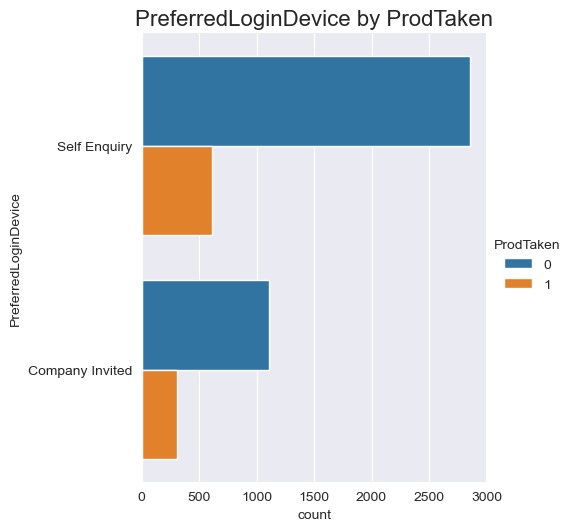

--------------------------------------------------------------------------------------------------------------


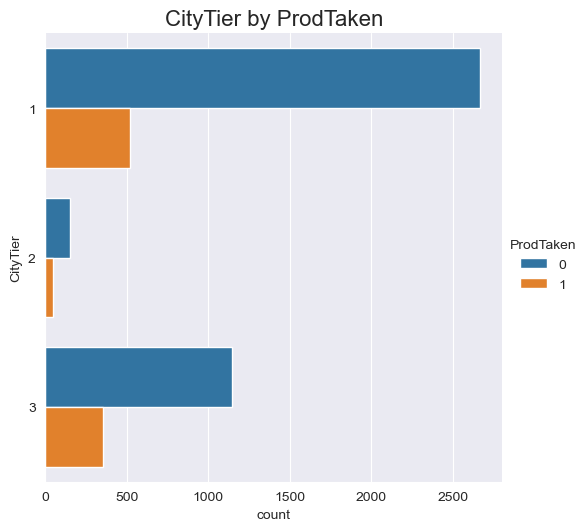

--------------------------------------------------------------------------------------------------------------


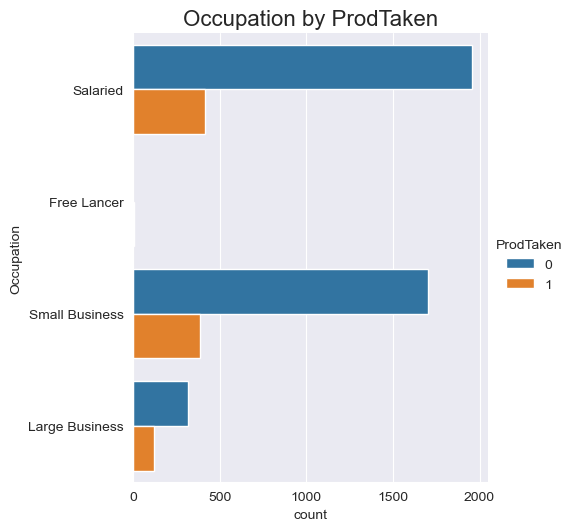

--------------------------------------------------------------------------------------------------------------


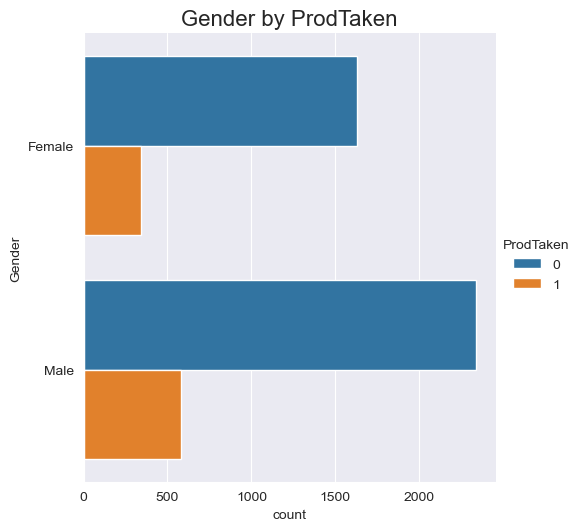

--------------------------------------------------------------------------------------------------------------


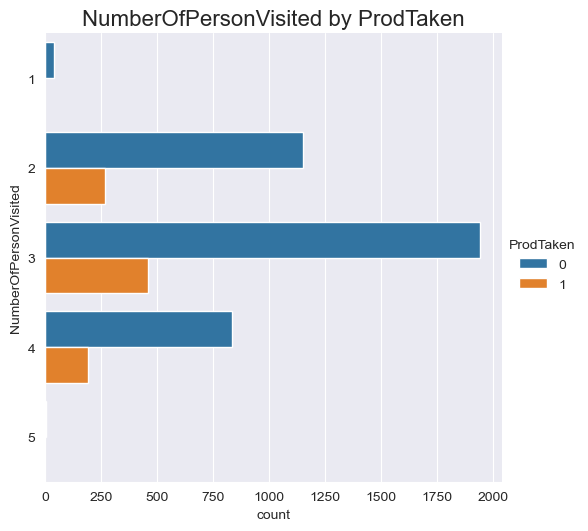

--------------------------------------------------------------------------------------------------------------


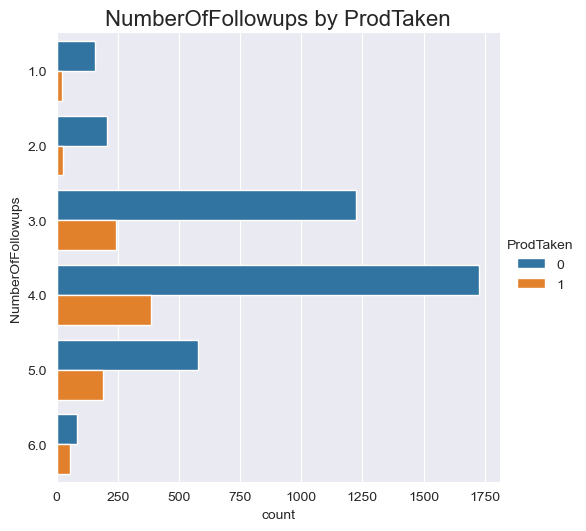

--------------------------------------------------------------------------------------------------------------


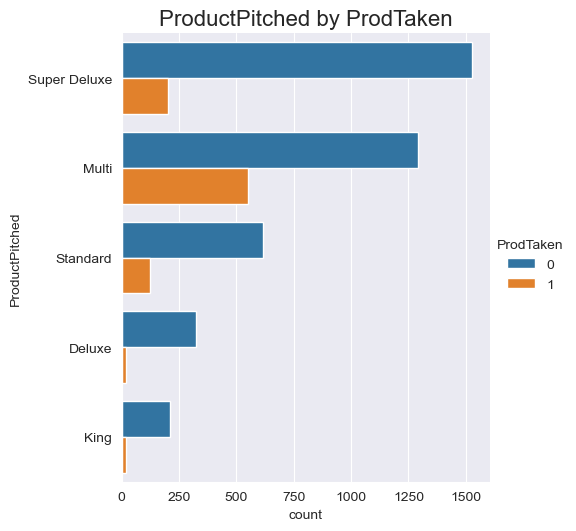

--------------------------------------------------------------------------------------------------------------


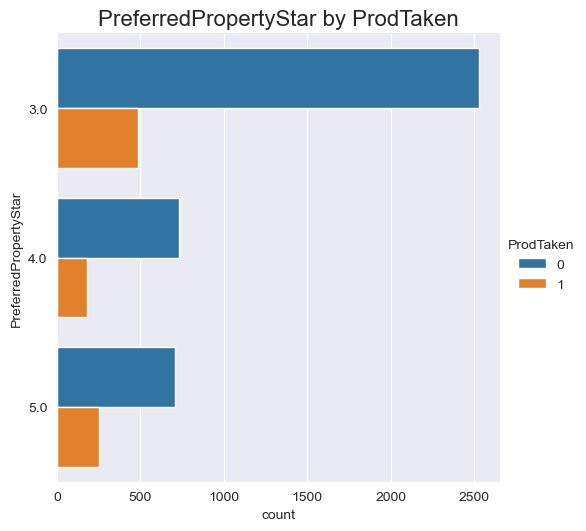

--------------------------------------------------------------------------------------------------------------


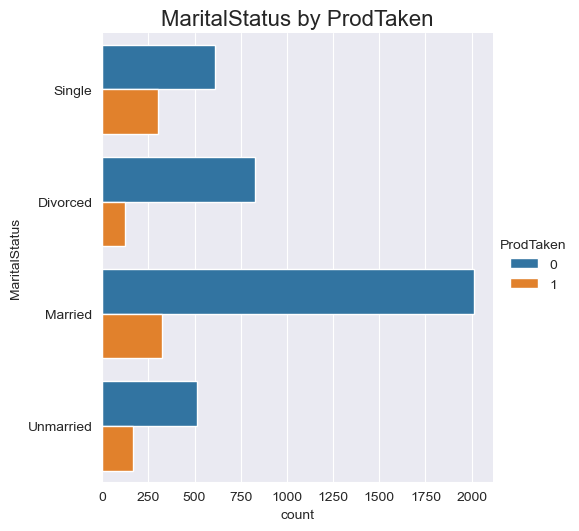

--------------------------------------------------------------------------------------------------------------


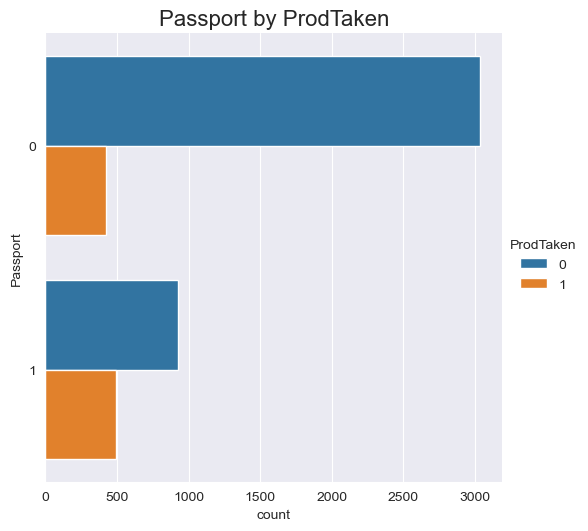

--------------------------------------------------------------------------------------------------------------


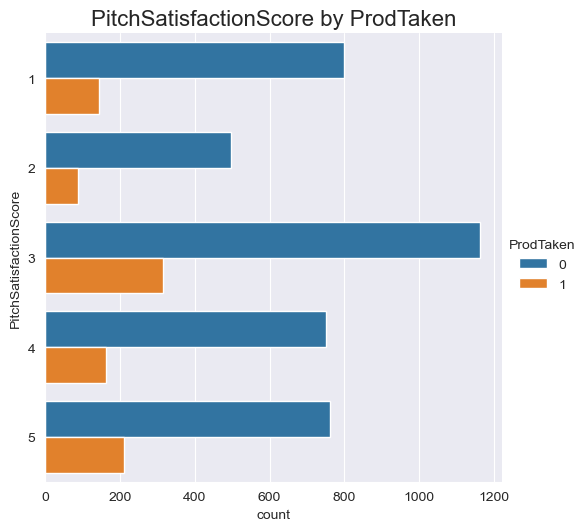

--------------------------------------------------------------------------------------------------------------


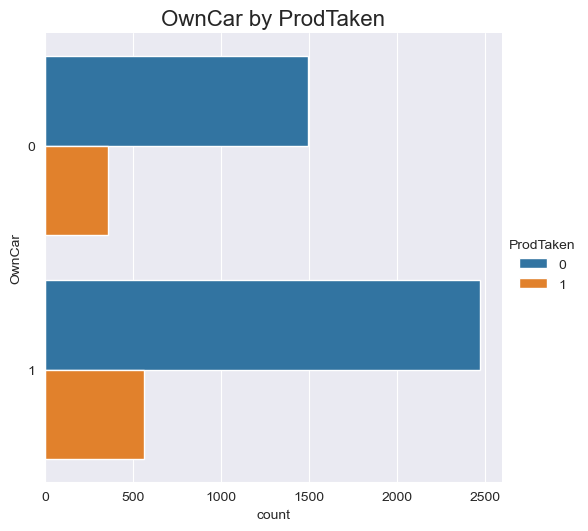

--------------------------------------------------------------------------------------------------------------


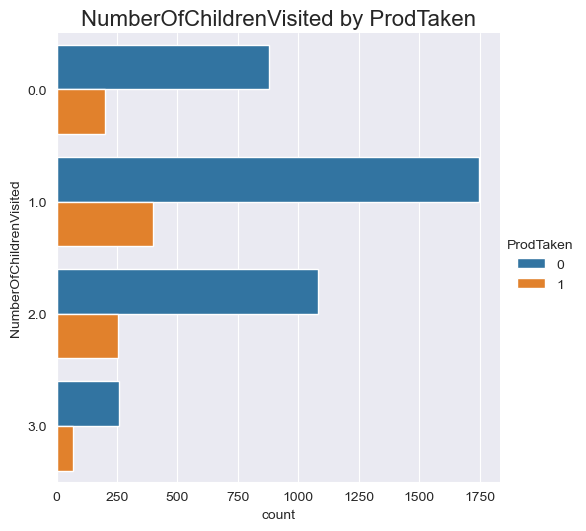

--------------------------------------------------------------------------------------------------------------


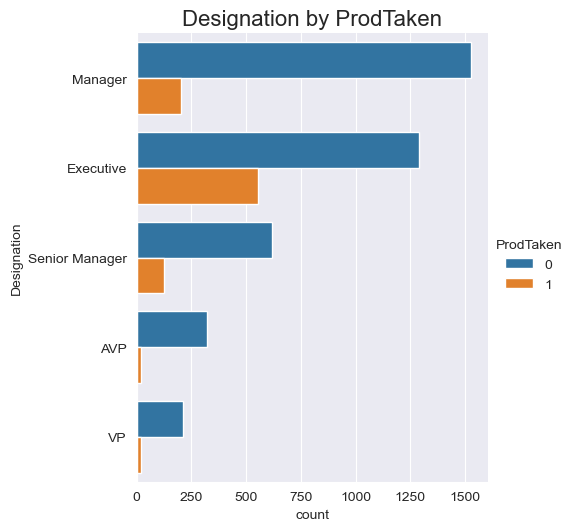

--------------------------------------------------------------------------------------------------------------


In [74]:
categ_target_plots(data.ProdTaken)

---

**Observations**
* Customers who took the previous travel plan expressed personal initiative by `Self Enquiry`.
* `CityTier 1` was the most preferred.
* More `Salaried` customers took the travel plan than other occupations.
* More`Male` customers took the travel plan.
* The majority of the customers who took the travel plan `visited with 3 persons`.
* Majority of the customers who took the travel plan got `4` follow ups from Sales.
* Of the travel plans taken, `Multi` was the most pitched.
* The most preferred property star was `3`.
* The bulk of customers who took the travel plan were either `Single` or `Married`
* Majority of the customers who took the travel plan had `Passports`
* The most frequent pitch satisfaction score was `3`
* More customer who had `Cars` took the travel plan.
* Majority of the customers who took the travel plan visited with `1 child`
* `Executive` customers took the travel plan more than other customers.

---